In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
%matplotlib inline
sns.set_theme()
pd.set_option('display.max_columns', None)

In [4]:
AAL=pd.read_csv('AAL.csv')
AAPL=pd.read_csv('AAPL.csv')
ALK=pd.read_csv('ALK.csv')
AMZN=pd.read_csv('AMZN.csv')
BHC=pd.read_csv('BHC.csv')
CS=pd.read_csv('CS.csv')
DB=pd.read_csv('DB.csv')
GOOG=pd.read_csv('GOOG.csv')
GS=pd.read_csv('GS.csv')
HA=pd.read_csv('HA.csv')
JNJ=pd.read_csv('JNJ.csv')
MRK=pd.read_csv('MRK.csv')
SP500=pd.read_csv('S&P500.csv')


In [5]:
industry=pd.read_csv('Annexure-I.csv')

In [6]:
AAPL.head()

Date       Open       High        Low      Close  Adj Close  \
0  01-10-2010  10.219643  10.235000  10.048214  10.090000   8.719163   
1  04-10-2010  10.057143  10.103572   9.920357   9.951428   8.599421   
2  05-10-2010  10.071428  10.337500  10.065000  10.319285   8.917298   
3  06-10-2010  10.342500  10.428214  10.187857  10.328215   8.925013   
4  07-10-2010  10.369286  10.374286  10.246786  10.329286   8.925941   

      Volume  
0  448142800  
1  435302000  
2  501967200  
3  670868800  
4  408399600

In [7]:
SP500.head()

Date         Open         High          Low        Close  \
0  01-10-2010  1143.489990  1150.300049  1139.420044  1146.239990   
1  04-10-2010  1144.959961  1148.160034  1131.869995  1137.030029   
2  05-10-2010  1140.680054  1162.760010  1140.680054  1160.750000   
3  06-10-2010  1159.810059  1162.329956  1154.849976  1159.969971   
4  07-10-2010  1161.569946  1163.869995  1151.410034  1158.060059   

     Adj Close      Volume  
0  1146.239990  4298910000  
1  1137.030029  3604110000  
2  1160.750000  4068840000  
3  1159.969971  4073160000  
4  1158.060059  3910550000

In [8]:
industry

Ticker         Industry                 Company Name
0     AAL         Aviation  American Airlines Group Inc
1     ALK         Aviation         Alaska Air Group Inc
2      HA         Aviation        Hawaiian Holdings Inc
3      CS          Finance                Credit Suisse
4      DB          Finance                Deutsche Bank
5      GS          Finance                Goldman Sachs
6     JNJ       Healthcare            Johnson & Johnson
7     MRK       Healthcare            Merck and CO inc.
8     BHC  Pharmaceuticals  Bausch Health Companies inc
9    AAPL       Technology                    Apple Inc
10   AMZN       Technology                       Amazon
11   GOOG       Technology                     Alphabet

In [9]:
new_row={'Ticker':'SP500','Industry':'Index','Company Name':'S&P500'}
industry = industry.append(new_row, ignore_index=True)
industry

Ticker         Industry                 Company Name
0     AAL         Aviation  American Airlines Group Inc
1     ALK         Aviation         Alaska Air Group Inc
2      HA         Aviation        Hawaiian Holdings Inc
3      CS          Finance                Credit Suisse
4      DB          Finance                Deutsche Bank
5      GS          Finance                Goldman Sachs
6     JNJ       Healthcare            Johnson & Johnson
7     MRK       Healthcare            Merck and CO inc.
8     BHC  Pharmaceuticals  Bausch Health Companies inc
9    AAPL       Technology                    Apple Inc
10   AMZN       Technology                       Amazon
11   GOOG       Technology                     Alphabet
12  SP500            Index                       S&P500

In [10]:
industry.loc[industry['Industry']=='Pharmaceuticals','Industry']='Healthcare'

In [11]:
industry

Ticker    Industry                 Company Name
0     AAL    Aviation  American Airlines Group Inc
1     ALK    Aviation         Alaska Air Group Inc
2      HA    Aviation        Hawaiian Holdings Inc
3      CS     Finance                Credit Suisse
4      DB     Finance                Deutsche Bank
5      GS     Finance                Goldman Sachs
6     JNJ  Healthcare            Johnson & Johnson
7     MRK  Healthcare            Merck and CO inc.
8     BHC  Healthcare  Bausch Health Companies inc
9    AAPL  Technology                    Apple Inc
10   AMZN  Technology                       Amazon
11   GOOG  Technology                     Alphabet
12  SP500       Index                       S&P500

In [12]:
CS.head()

Date       Open       High        Low      Close  Adj Close    Volume
0  04-01-2010  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0
1  05-01-2010  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0
2  06-01-2010  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0
3  07-01-2010  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0
4  08-01-2010  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0

In [13]:
CS.shape

(2712, 7)

In [14]:
data=pd.DataFrame()
dataframes = {name: globals()[name] for name in industry['Ticker']}
for df_name, df in dataframes.items():
    df['Industry']=industry.loc[industry['Ticker']==df_name,'Industry'].at[industry.loc[industry['Ticker']==df_name,'Industry'].index[0]]
    df['Company Name']=industry.loc[industry['Ticker']==df_name,'Company Name'].at[industry.loc[industry['Ticker']==df_name,'Company Name'].index[0]]
    df['Date']=pd.to_datetime(df.Date,format='%d-%m-%Y')
    df=df[df.Date.between('2010-10-01','2020-09-30')]
    df=df.set_index('Date')
    print("{} has shape {}".format(df_name,df.shape))
    data=pd.concat([data,df])

AAL has shape (2517, 8)
ALK has shape (2517, 8)
HA has shape (2517, 8)
CS has shape (2517, 8)
DB has shape (2517, 8)
GS has shape (2517, 8)
JNJ has shape (2517, 8)
MRK has shape (2517, 8)
BHC has shape (2517, 8)
AAPL has shape (2517, 8)
AMZN has shape (2517, 8)
GOOG has shape (2517, 8)
SP500 has shape (2517, 8)


In [15]:
data.head()

Open  High   Low  Close  Adj Close     Volume  Industry  \
Date                                                                  
2010-10-01  9.29  9.39  9.21   9.29   8.758067  3603800.0  Aviation   
2010-10-04  9.24  9.48  9.05   9.12   8.597802  3856800.0  Aviation   
2010-10-05  9.27  9.35  9.15   9.23   8.701504  3896600.0  Aviation   
2010-10-06  9.27  9.40  9.15   9.23   8.701504  3230200.0  Aviation   
2010-10-07  9.30  9.31  9.07   9.24   8.710930  3877700.0  Aviation   

                           Company Name  
Date                                     
2010-10-01  American Airlines Group Inc  
2010-10-04  American Airlines Group Inc  
2010-10-05  American Airlines Group Inc  
2010-10-06  American Airlines Group Inc  
2010-10-07  American Airlines Group Inc

In [16]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Industry        0
Company Name    0
dtype: int64

In [17]:
data.shape

(32721, 8)

In [18]:
AAL.shape[0]*13

32721

In [19]:
data.drop(['Open','High','Low','Adj Close'],axis=1,inplace=True)

In [20]:
data.head()

Close     Volume  Industry                 Company Name
Date                                                               
2010-10-01   9.29  3603800.0  Aviation  American Airlines Group Inc
2010-10-04   9.12  3856800.0  Aviation  American Airlines Group Inc
2010-10-05   9.23  3896600.0  Aviation  American Airlines Group Inc
2010-10-06   9.23  3230200.0  Aviation  American Airlines Group Inc
2010-10-07   9.24  3877700.0  Aviation  American Airlines Group Inc

In [21]:
data.tail()

Close        Volume Industry Company Name
Date                                                       
2020-09-24  3246.590088  4.599470e+09    Index       S&P500
2020-09-25  3298.459961  3.792220e+09    Index       S&P500
2020-09-28  3351.600098  3.946060e+09    Index       S&P500
2020-09-29  3335.469971  3.651880e+09    Index       S&P500
2020-09-30  3363.000000  4.722530e+09    Index       S&P500

In [22]:
# Creating a cleaned merged DataFrame which can be used for various Industry Wise and Company Wise A
data.to_csv('Merged_data.csv')

In [23]:
CS.head()

Date       Open       High        Low      Close  Adj Close    Volume  \
0 2010-01-04  49.902344  51.035156  49.765625  50.771484  34.852165  734200.0   
1 2010-01-05  51.250000  51.318359  50.644531  51.191406  35.140423  447700.0   
2 2010-01-06  50.224609  50.917969  49.951172  50.478516  34.651054  751200.0   
3 2010-01-07  51.250000  52.646484  51.201172  52.519531  36.052116  833700.0   
4 2010-01-08  52.548828  53.339844  52.441406  53.291016  36.581703  706900.0   

  Industry   Company Name  
0  Finance  Credit Suisse  
1  Finance  Credit Suisse  
2  Finance  Credit Suisse  
3  Finance  Credit Suisse  
4  Finance  Credit Suisse

In [24]:
data.head()

Close     Volume  Industry                 Company Name
Date                                                               
2010-10-01   9.29  3603800.0  Aviation  American Airlines Group Inc
2010-10-04   9.12  3856800.0  Aviation  American Airlines Group Inc
2010-10-05   9.23  3896600.0  Aviation  American Airlines Group Inc
2010-10-06   9.23  3230200.0  Aviation  American Airlines Group Inc
2010-10-07   9.24  3877700.0  Aviation  American Airlines Group Inc

In [25]:
prices=pd.pivot_table(data=data,values='Close',index='Date',columns=['Industry','Company Name'])
prices.head()

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2010-10-01                12.4475                        9.29   
2010-10-04                12.1425                        9.12   
2010-10-05                12.2150                        9.23   
2010-10-06                12.1875                        9.23   
2010-10-07                11.6250                        9.24   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2010-10-01                    5.96     42.226563     52.595421    147.699997   
2010-10-04                    5.75     41.914063     51.755726    146.570007   
2010-10-05                    5.85     43.154297     53.950382    149.570007   
2010-10-06                    5.97     43.437500     54.608780    150.839996   
2010-10-07                    6.15     43.671875     54.036259    151.110001   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2010-10-01                     25.750000         61.750000         36.599998   
2010-10-04                     25.870001         61.669998         36.520000   
2010-10-05                     26.299999         62.799999         37.020000   
2010-10-06                     26.690001         63.209999         37.009998   
2010-10-07                     26.600000         63.220001         36.709999   

Industry            Index  Technology                         
Company Name       S&P500    Alphabet      Amazon  Apple Inc  
Date                                                          
2010-10-01    1146.239990  261.828613  153.710007  10.090000  
2010-10-04    1137.030029  260.199707  155.389999   9.951428  
2010-10-05    1160.750000  268.110046  160.869995  10.319285  
2010-10-06    1159.969971  266.177307  155.399994  10.328215  
2010-10-07    1158.060059  264.015411  156.270004  10.329286

In [26]:
prices.isnull().sum()

Industry    Company Name               
Aviation    Alaska Air Group Inc           0
            American Airlines Group Inc    0
            Hawaiian Holdings Inc          0
Finance     Credit Suisse                  0
            Deutsche Bank                  0
            Goldman Sachs                  0
Healthcare  Bausch Health Companies inc    0
            Johnson & Johnson              0
            Merck and CO inc.              0
Index       S&P500                         0
Technology  Alphabet                       0
            Amazon                         0
            Apple Inc                      0
dtype: int64

In [27]:
prices.shape

(2517, 13)

In [28]:
prices.columns

MultiIndex([(  'Aviation',        'Alaska Air Group Inc'),
            (  'Aviation', 'American Airlines Group Inc'),
            (  'Aviation',       'Hawaiian Holdings Inc'),
            (   'Finance',               'Credit Suisse'),
            (   'Finance',               'Deutsche Bank'),
            (   'Finance',               'Goldman Sachs'),
            ('Healthcare', 'Bausch Health Companies inc'),
            ('Healthcare',           'Johnson & Johnson'),
            ('Healthcare',           'Merck and CO inc.'),
            (     'Index',                      'S&P500'),
            ('Technology',                    'Alphabet'),
            ('Technology',                      'Amazon'),
            ('Technology',                   'Apple Inc')],
           names=['Industry', 'Company Name'])

In [29]:
dict(prices.columns).keys()


dict_keys(['Aviation', 'Finance', 'Healthcare', 'Index', 'Technology'])

In [265]:
pd.pivot_table?

In [266]:
price_vol=pd.pivot_table(data=data,values=['Close','Volume'],index='Date',columns='Company Name')

In [270]:
price_vol.head()

Close                          \
Company Name Alaska Air Group Inc    Alphabet      Amazon   
Date                                                        
2010-10-01                12.4475  261.828613  153.710007   
2010-10-04                12.1425  260.199707  155.389999   
2010-10-05                12.2150  268.110046  160.869995   
2010-10-06                12.1875  266.177307  155.399994   
2010-10-07                11.6250  264.015411  156.270004   

                                                     \
Company Name American Airlines Group Inc  Apple Inc   
Date                                                  
2010-10-01                          9.29  10.090000   
2010-10-04                          9.12   9.951428   
2010-10-05                          9.23  10.319285   
2010-10-06                          9.23  10.328215   
2010-10-07                          9.24  10.329286   

                                                                      \
Company Name Bausch Health Companies inc Credit Suisse Deutsche Bank   
Date                                                                   
2010-10-01                     25.750000     42.226563     52.595421   
2010-10-04                     25.870001     41.914063     51.755726   
2010-10-05                     26.299999     43.154297     53.950382   
2010-10-06                     26.690001     43.437500     54.608780   
2010-10-07                     26.600000     43.671875     54.036259   

                                                                    \
Company Name Goldman Sachs Hawaiian Holdings Inc Johnson & Johnson   
Date                                                                 
2010-10-01      147.699997                  5.96         61.750000   
2010-10-04      146.570007                  5.75         61.669998   
2010-10-05      149.570007                  5.85         62.799999   
2010-10-06      150.839996                  5.97         63.209999   
2010-10-07      151.110001                  6.15         63.220001   

                                                          Volume             \
Company Name Merck and CO inc.       S&P500 Alaska Air Group Inc   Alphabet   
Date                                                                          
2010-10-01           36.599998  1146.239990            1663600.0  4466600.0   
2010-10-04           36.520000  1137.030029            1512400.0  3895400.0   
2010-10-05           37.020000  1160.750000            2567200.0  7040400.0   
2010-10-06           37.009998  1159.969971            1043600.0  5545200.0   
2010-10-07           36.709999  1158.060059            7682400.0  4809400.0   

                                                                  \
Company Name     Amazon American Airlines Group Inc    Apple Inc   
Date                                                               
2010-10-01    8683400.0                   3603800.0  448142800.0   
2010-10-04    5346500.0                   3856800.0  435302000.0   
2010-10-05    5620000.0                   3896600.0  501967200.0   
2010-10-06    6060800.0                   3230200.0  670868800.0   
2010-10-07    4622000.0                   3877700.0  408399600.0   

                                                                      \
Company Name Bausch Health Companies inc Credit Suisse Deutsche Bank   
Date                                                                   
2010-10-01                     5778700.0     1814900.0     2010600.0   
2010-10-04                     4187200.0     1085600.0     1245600.0   
2010-10-05                     4610300.0     1025300.0     2270900.0   
2010-10-06                     4448900.0      871300.0     1887400.0   
2010-10-07                     2453900.0     1377000.0     1191000.0   

                                                                    \
Company Name Goldman Sachs Hawaiian Holdings Inc Johnson & Johnson   
Date                                                             

In [279]:
price_vol.loc[:,'Close'].columns

Index(['Alaska Air Group Inc', 'Alphabet', 'Amazon',
       'American Airlines Group Inc', 'Apple Inc',
       'Bausch Health Companies inc', 'Credit Suisse', 'Deutsche Bank',
       'Goldman Sachs', 'Hawaiian Holdings Inc', 'Johnson & Johnson',
       'Merck and CO inc.', 'S&P500'],
      dtype='object', name='Company Name')

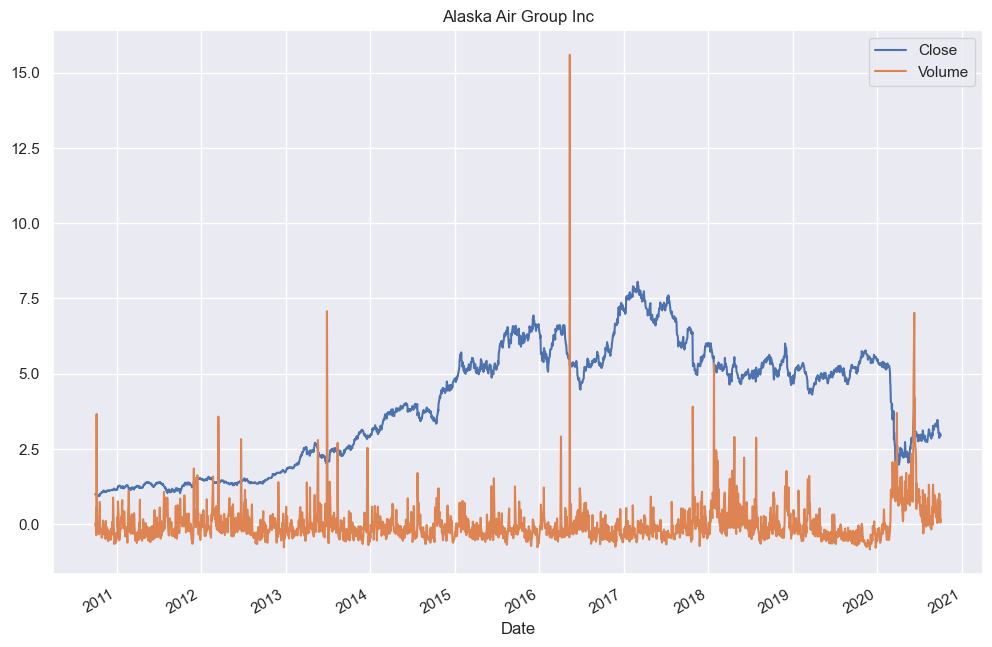

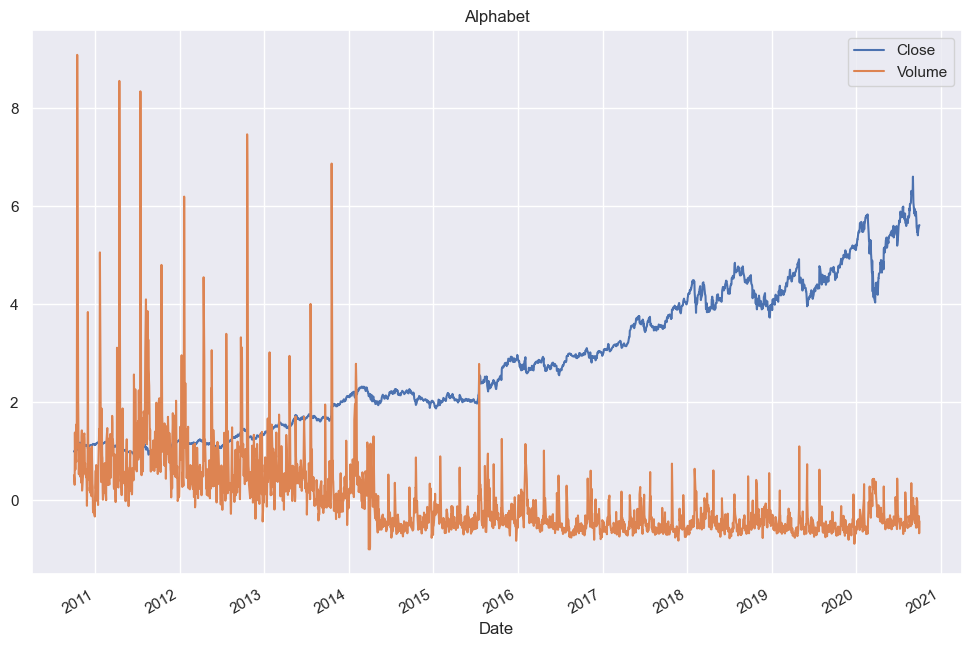

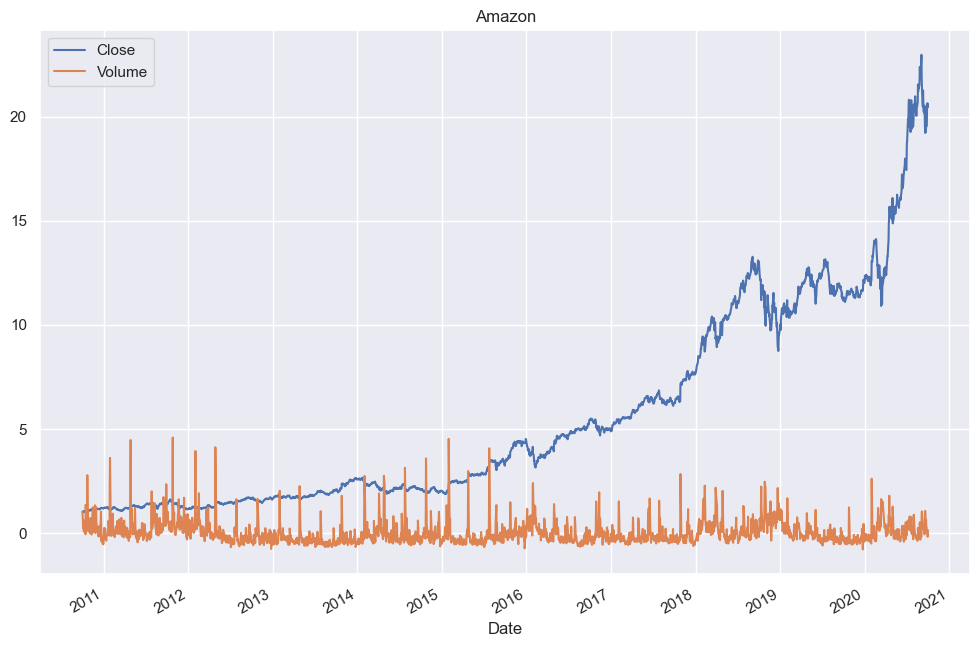

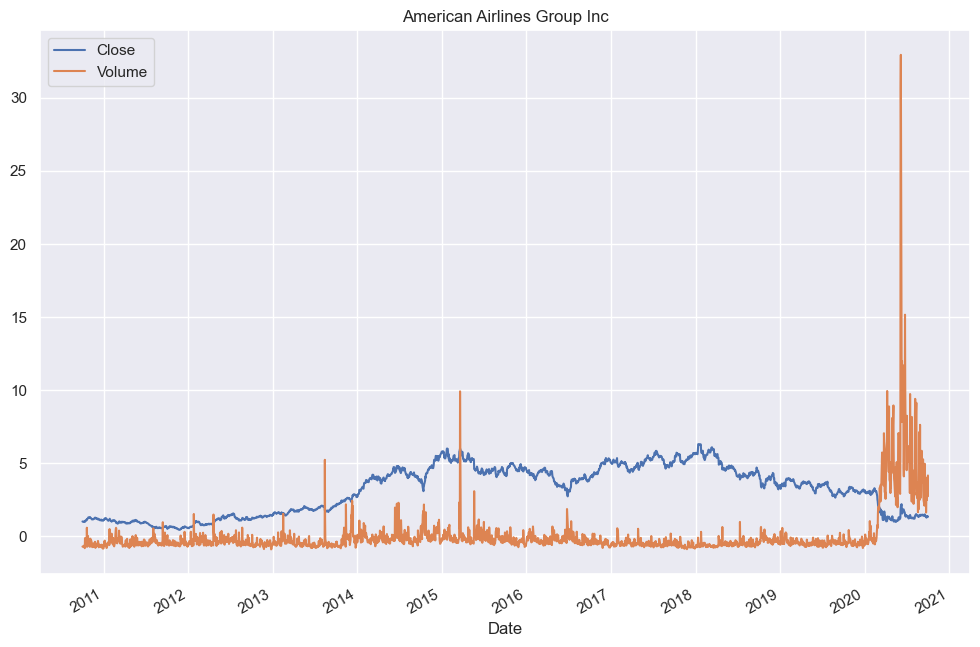

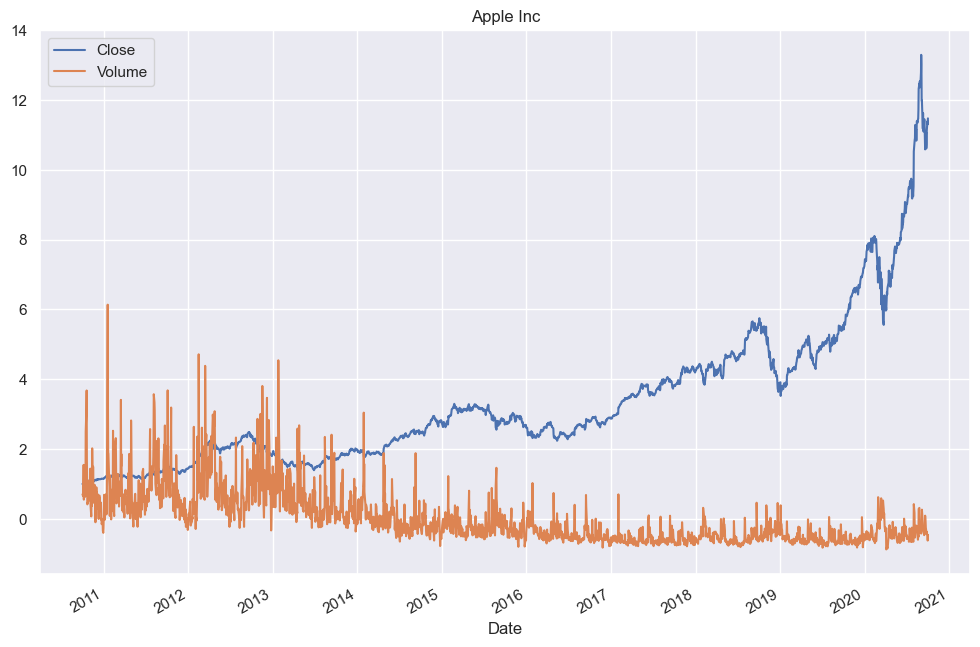

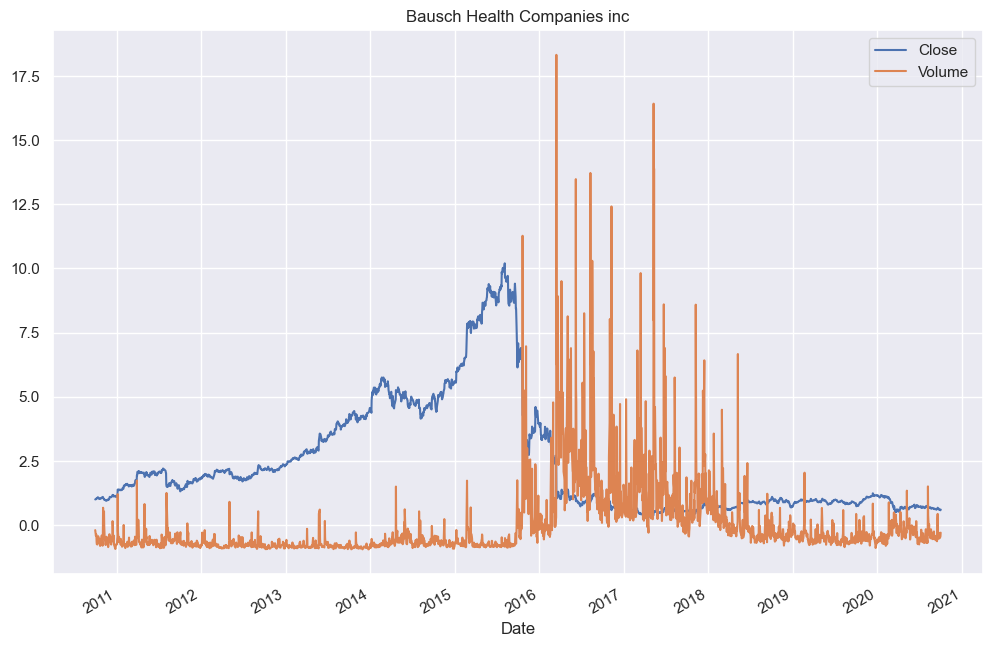

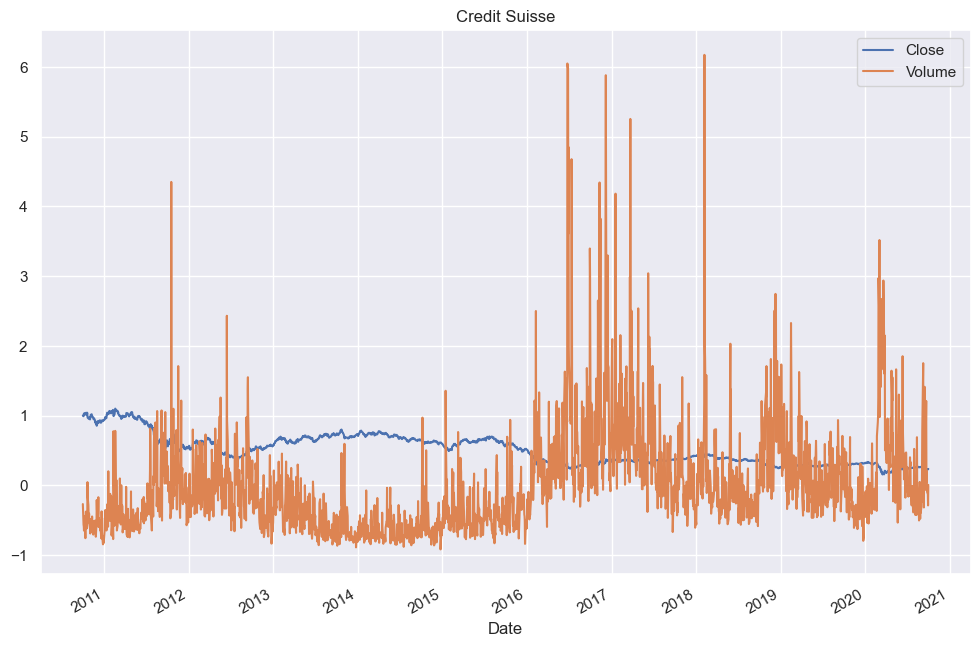

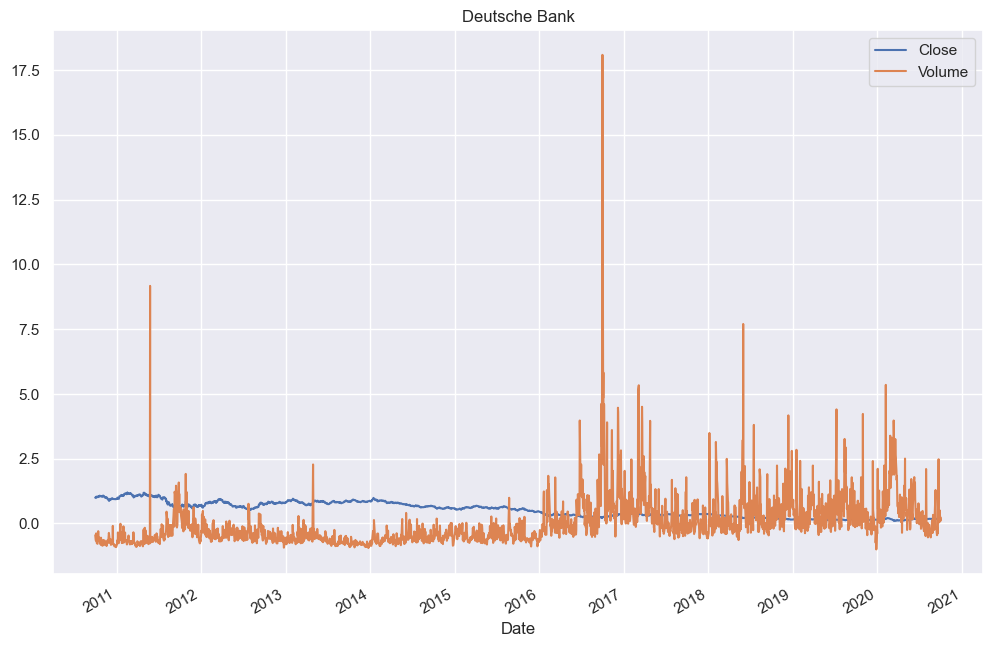

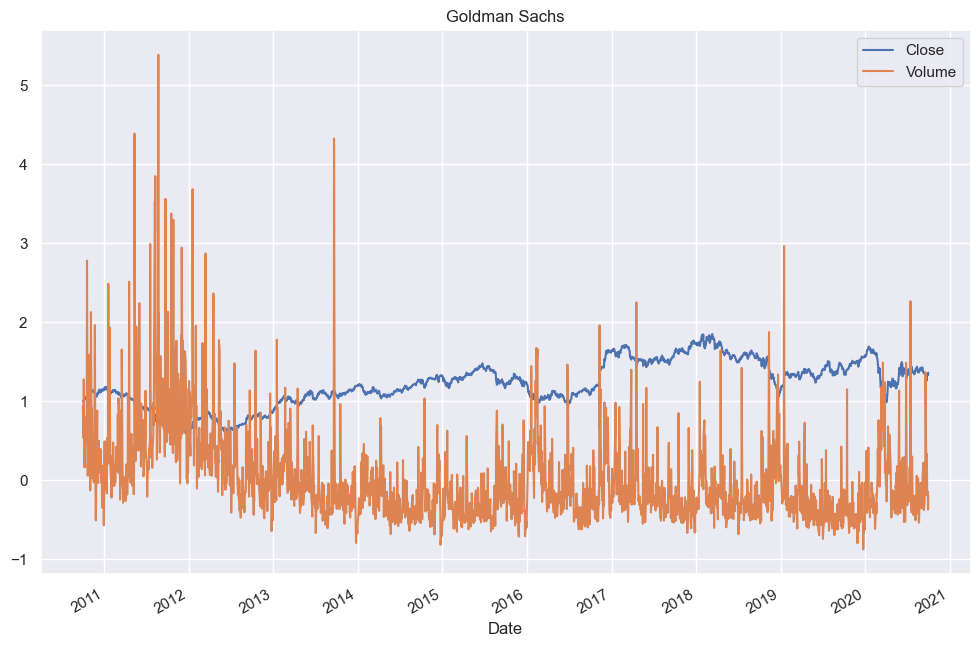

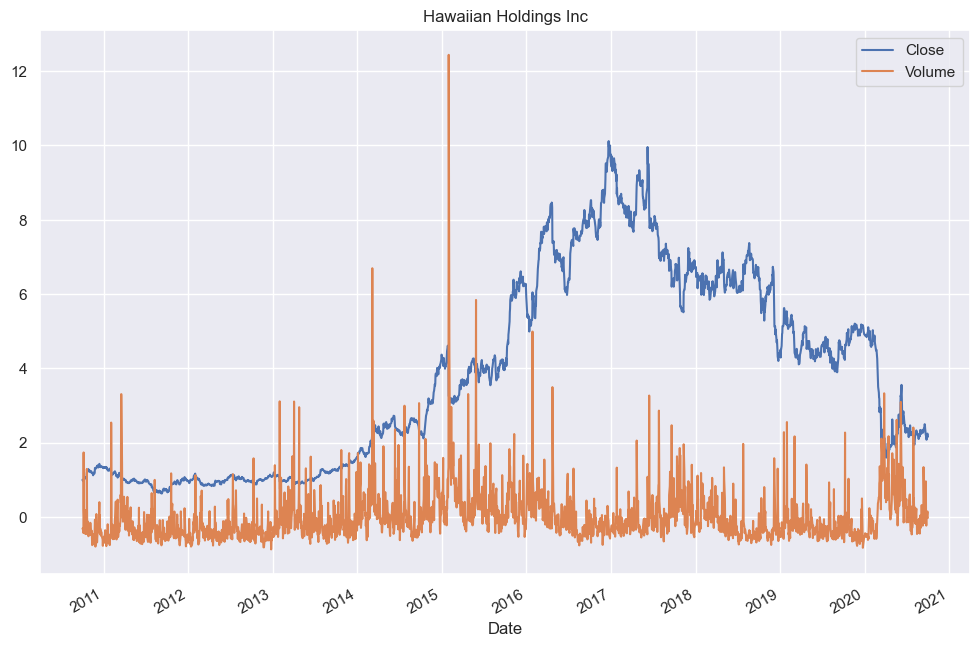

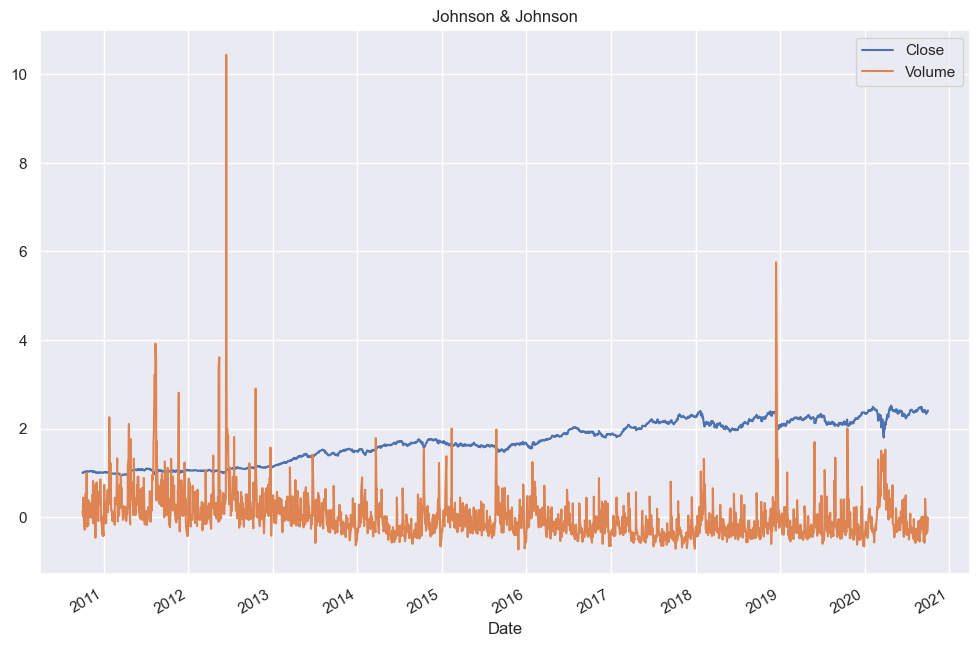

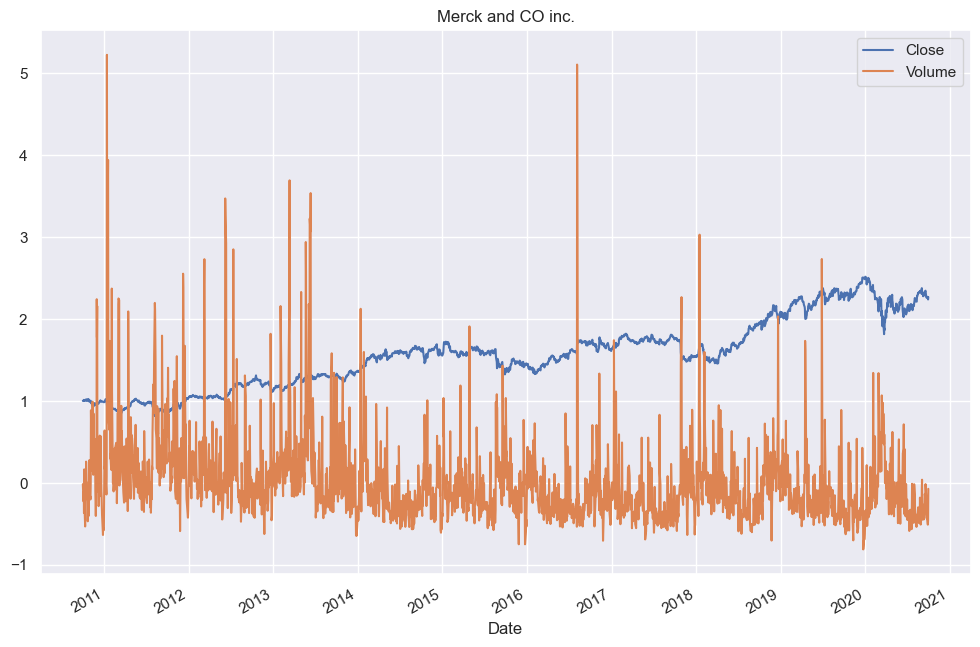

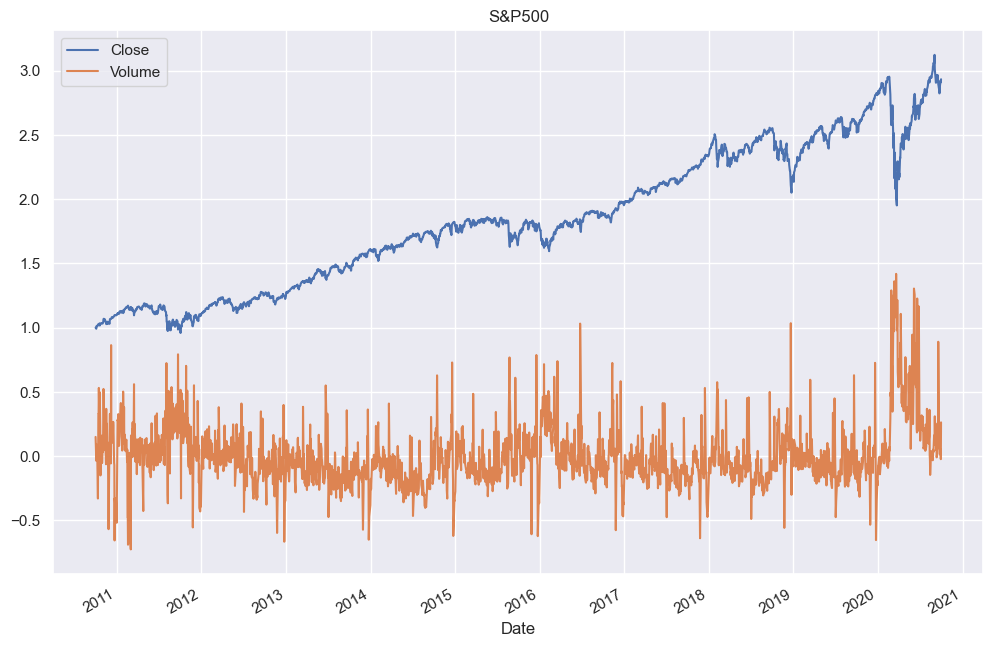

In [290]:
for i in price_vol.loc[:,'Close'].columns:
    for j in dict(price_vol.columns).keys():
        if j=='Close':
            (price_vol[j,i]/price_vol[j,i][0]).plot(label=j,figsize=[12,8])
        else:
            x=price_vol[j,i]-price_vol[j,i].mean()
            (x/price_vol[j,i].mean()).plot(label=j,figsize=[12,8])
    plt.legend()
    plt.title(i)
    plt.show()

{'Close': 'S&P500', 'Volume': 'S&P500'}

## Price Charts

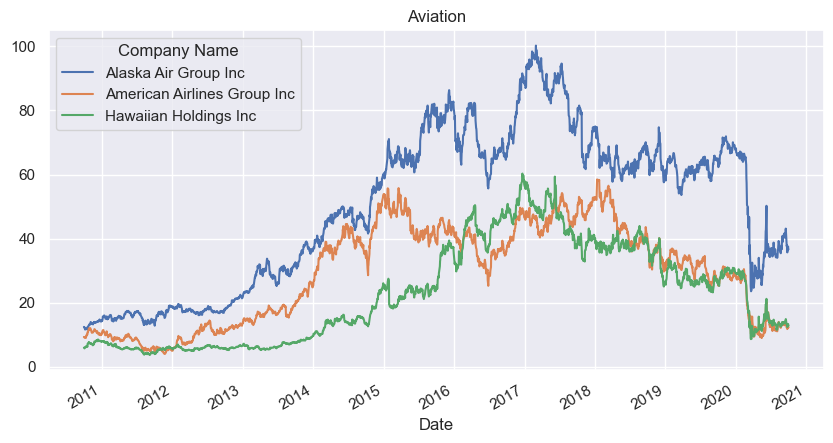

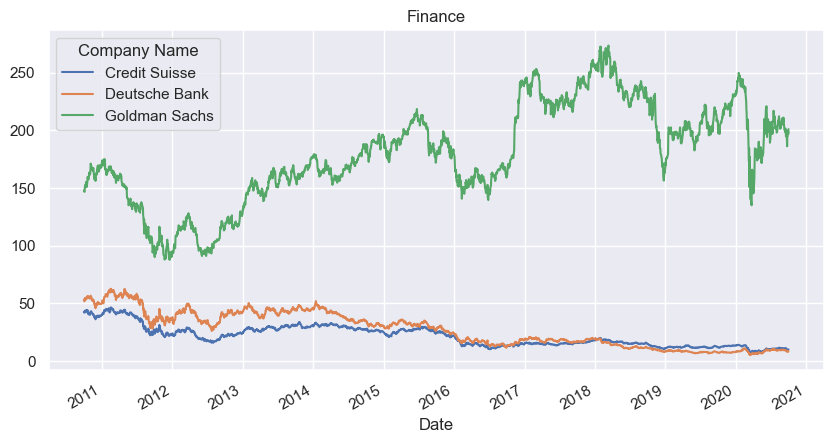

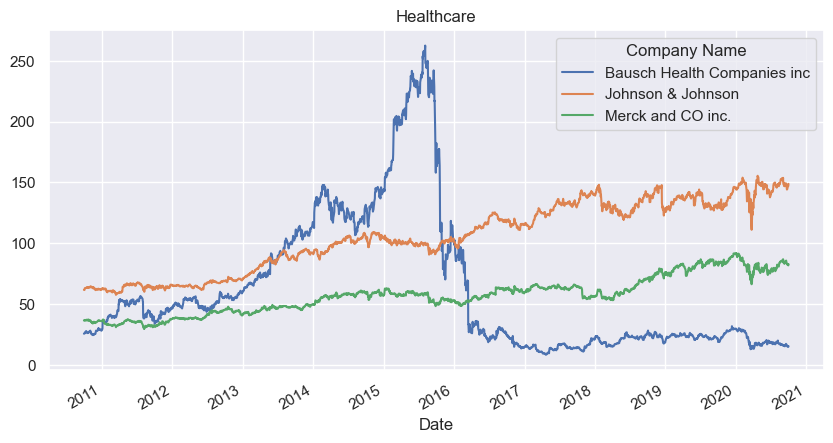

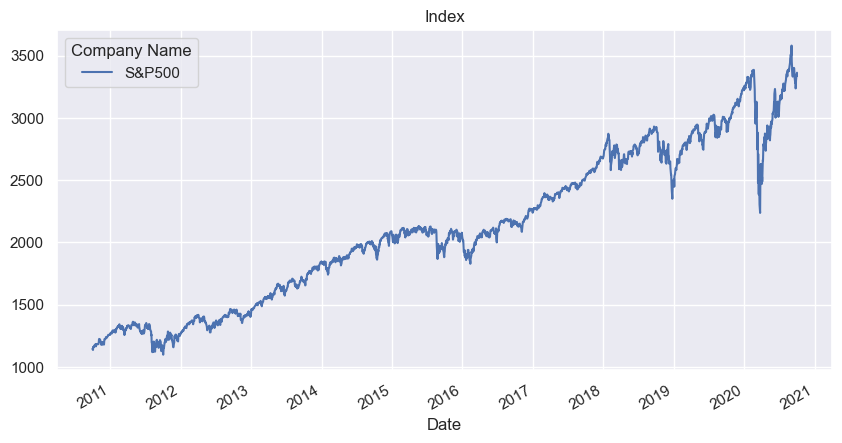

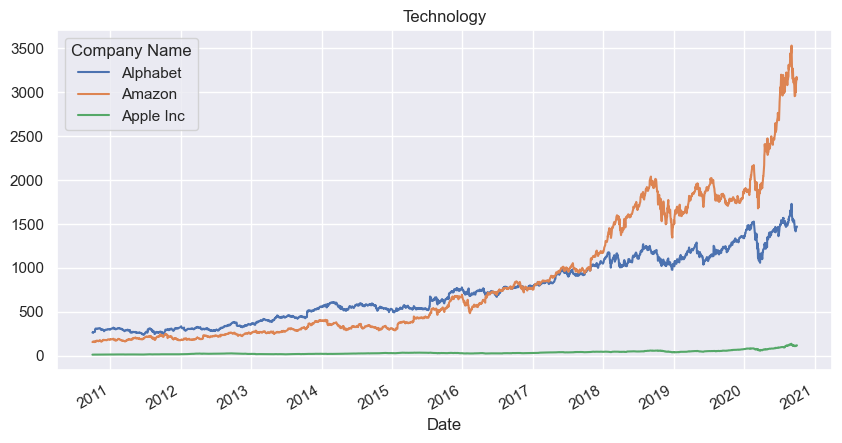

In [30]:
for i in dict(prices.columns).keys():
    prices[i].plot(title = i, figsize=(10,5))
    plt.title(i)
    plt.show()



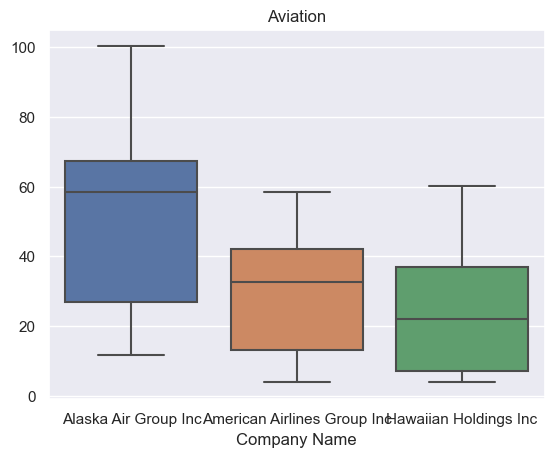

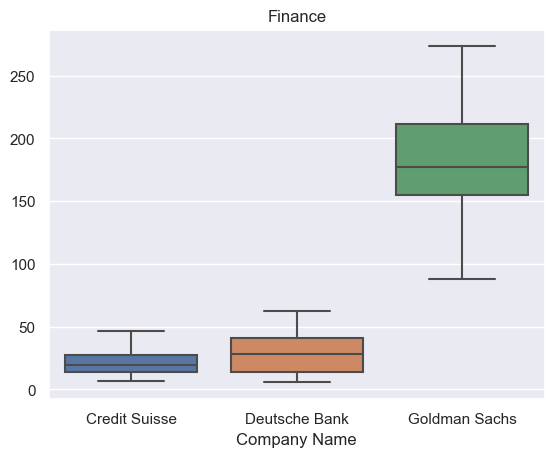

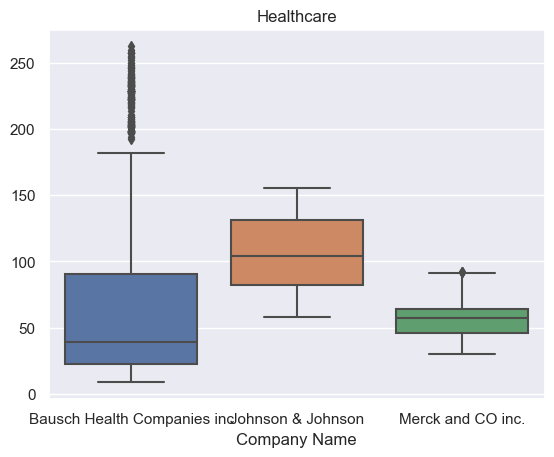

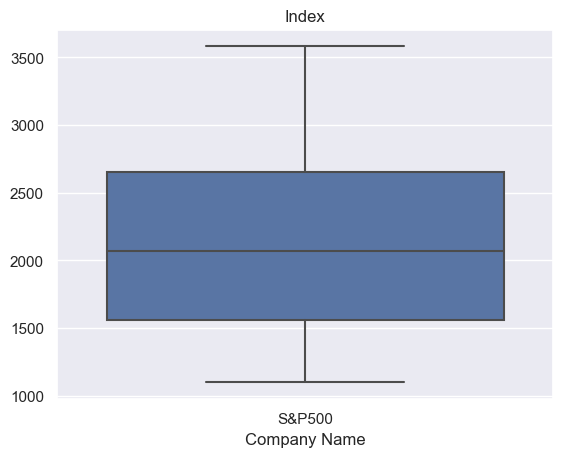

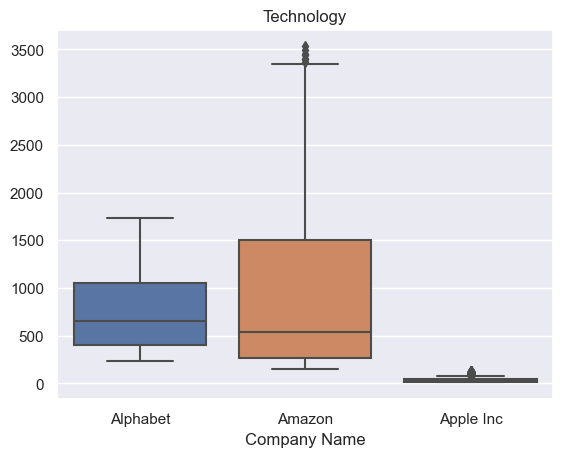

In [31]:
for i in dict(prices.columns).keys():
    sns.boxplot(prices[i])
    plt.title(i)
    plt.show()

## Normalized Price Charts

In [32]:
prices_normalized=prices/prices.iloc[0]

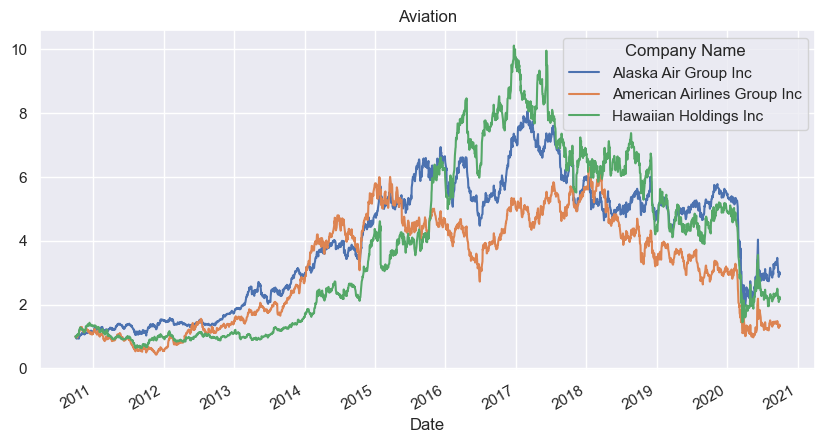

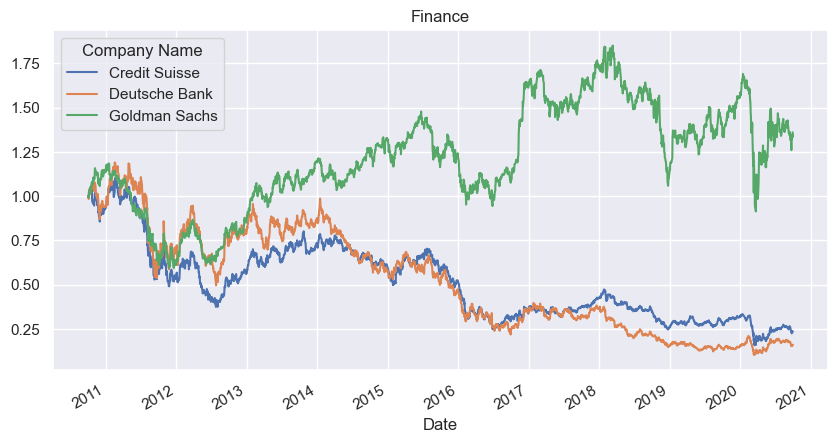

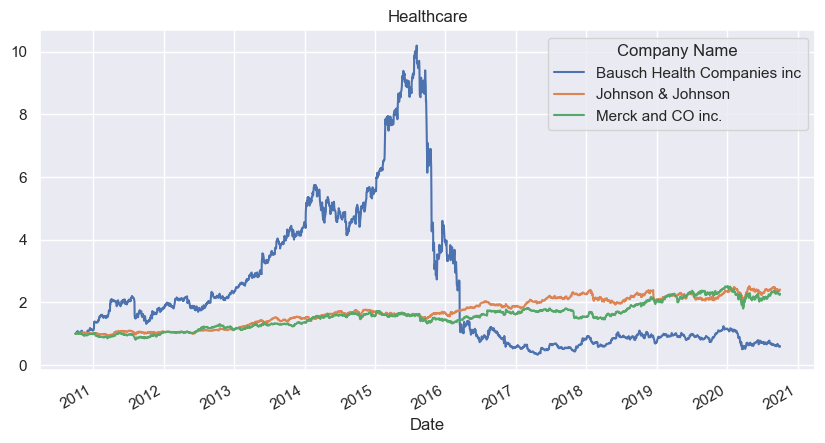

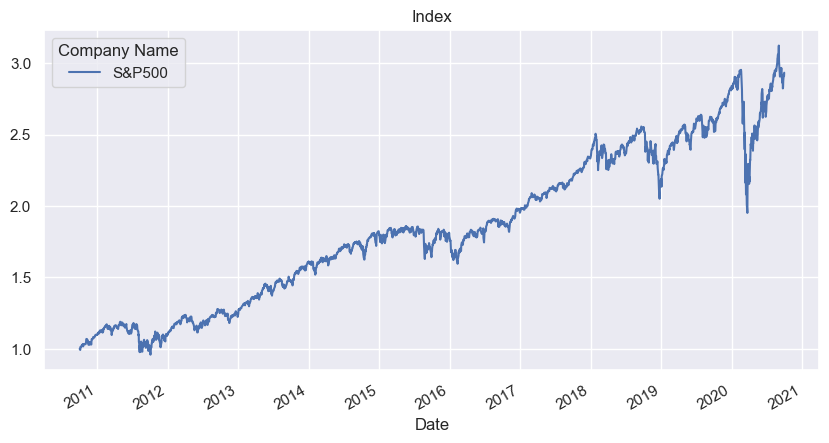

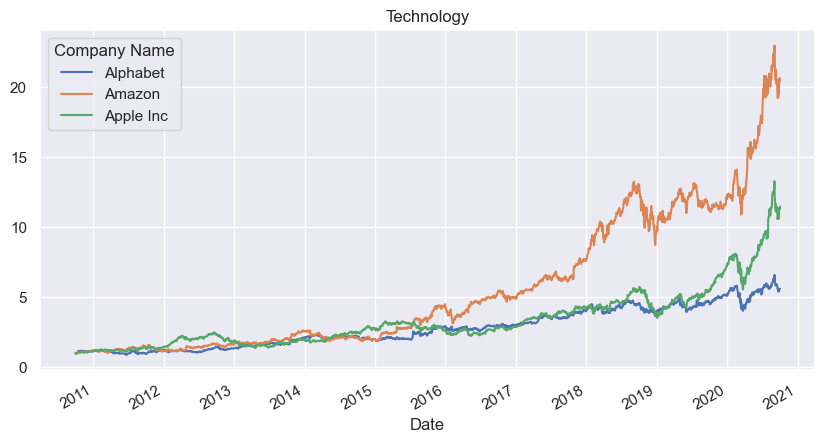

In [33]:
for i in dict(prices_normalized.columns).keys():
    prices_normalized[i].plot(title = i, figsize=(10,5))
    plt.title(i)
    plt.show()


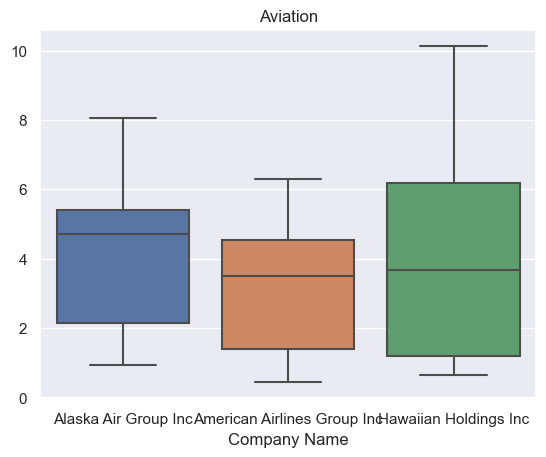

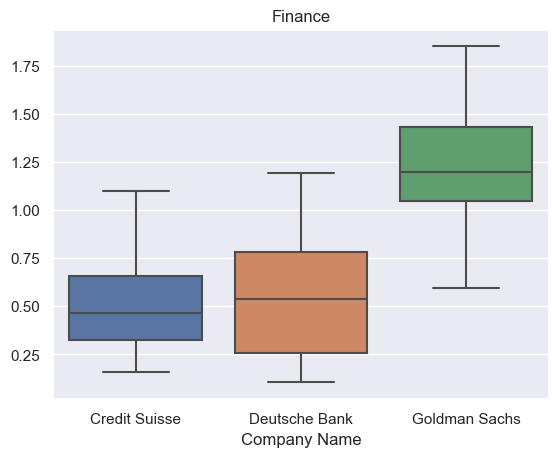

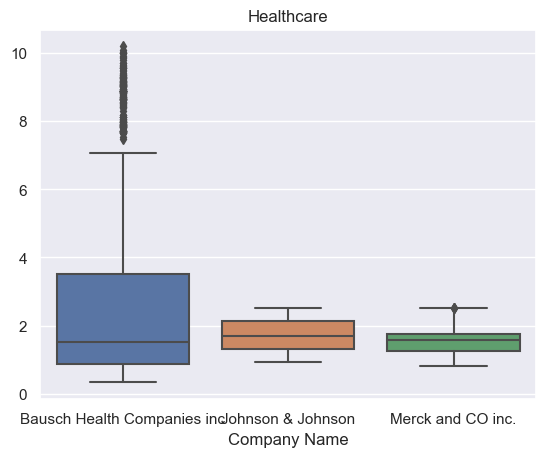

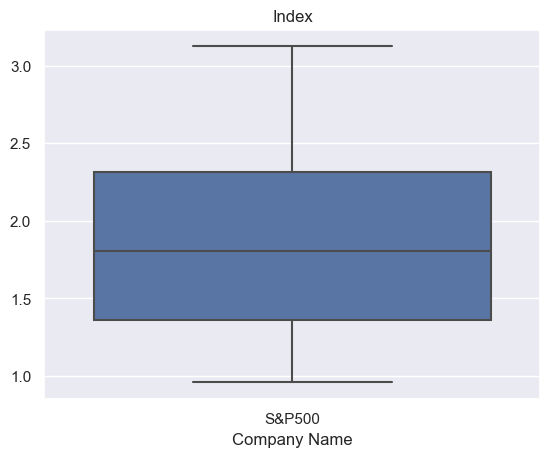

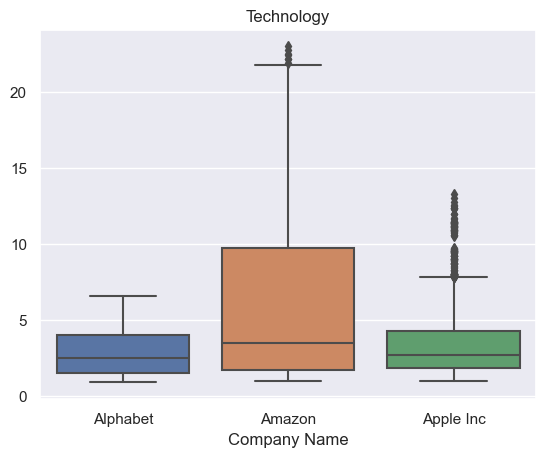

In [34]:
for i in dict(prices.columns).keys():
    sns.boxplot(prices_normalized[i])
    plt.title(i)
    plt.show()

## Industry Wise Price Variation
Assuming the price action of an industry is the mean of the prices of the stocks of the companies belonging to an industry

In [35]:
industry_prices=pd.pivot_table(data=data,values='Close',index='Date',columns='Industry',aggfunc='mean')
industry_prices.head()

Industry    Aviation    Finance  Healthcare        Index  Technology
Date                                                                
2010-10-01  9.232500  80.840660   41.366666  1146.239990  141.876207
2010-10-04  9.004167  80.079932   41.353333  1137.030029  141.847045
2010-10-05  9.098333  82.224895   42.039999  1160.750000  146.433109
2010-10-06  9.129167  82.962092   42.303333  1159.969971  143.968505
2010-10-07  9.005000  82.939378   42.176667  1158.060059  143.538234

In [36]:
industry_prices.shape

(2517, 5)

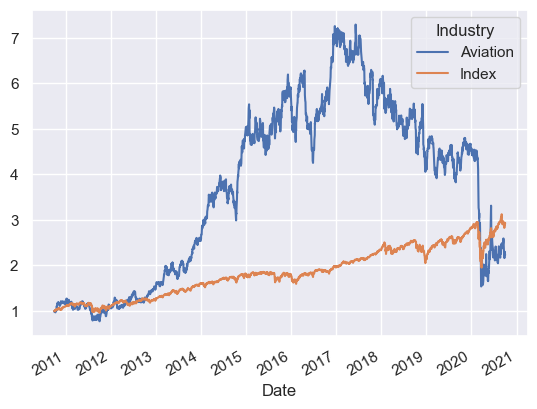

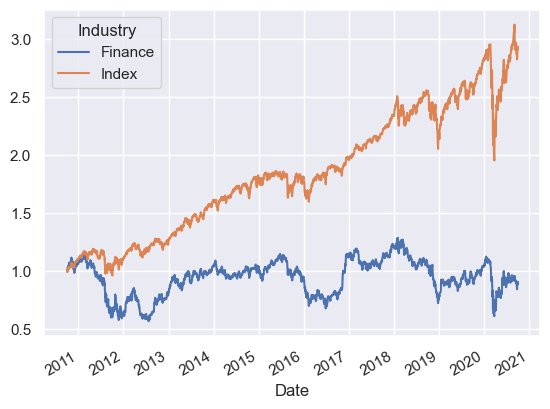

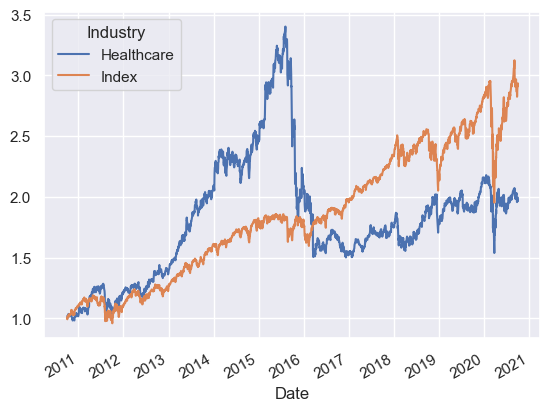

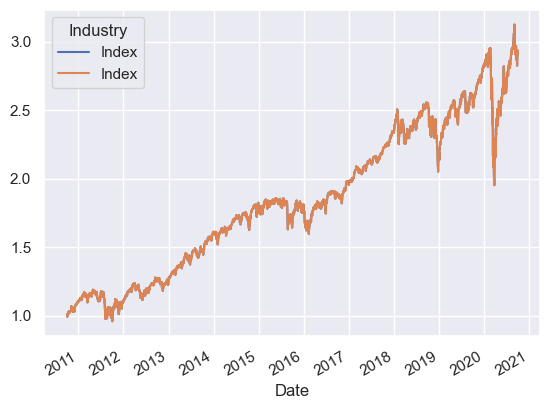

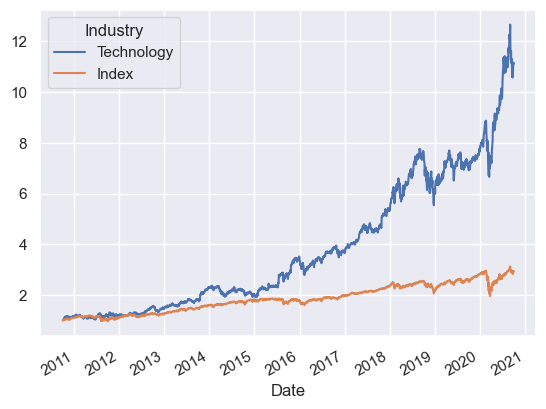

In [37]:
norm=industry_prices/industry_prices.iloc[0]
for i in industry_prices.columns:
    norm[[i,'Index']].plot()
    plt.show()

## Histograms of Price Fluctuations About Thier Means

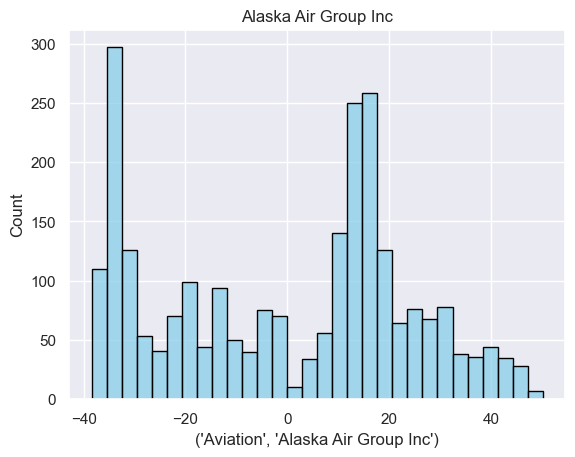

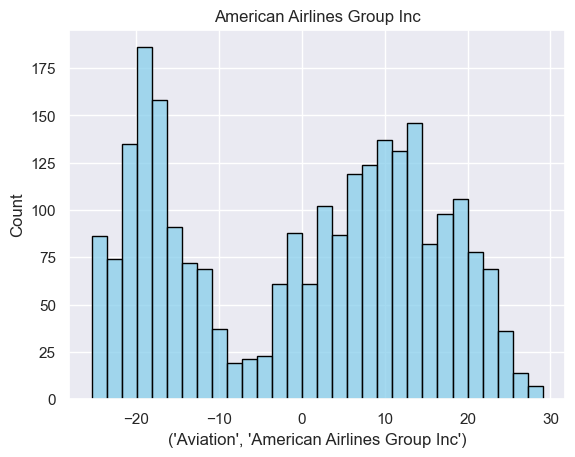

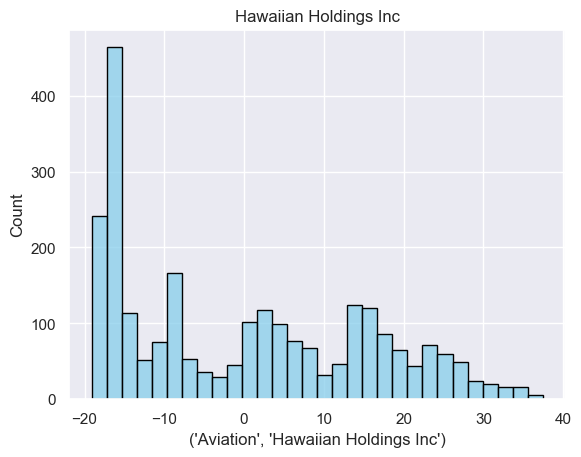

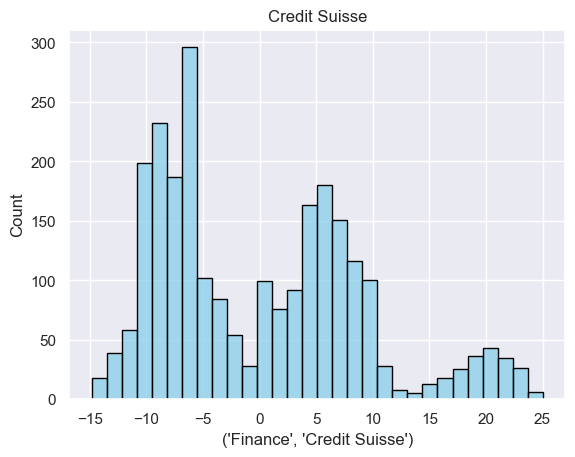

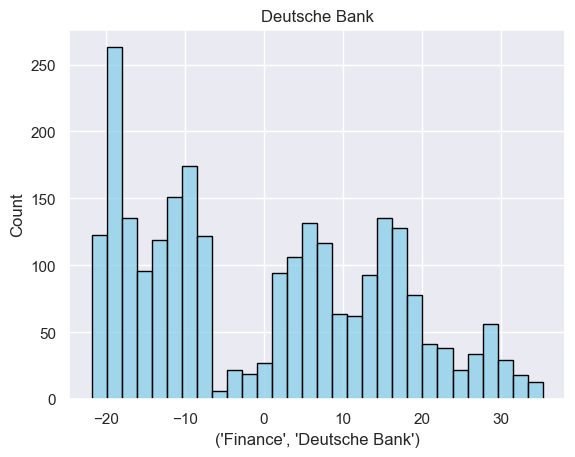

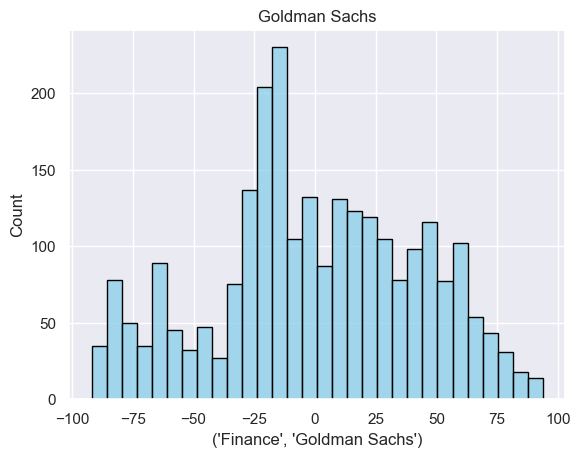

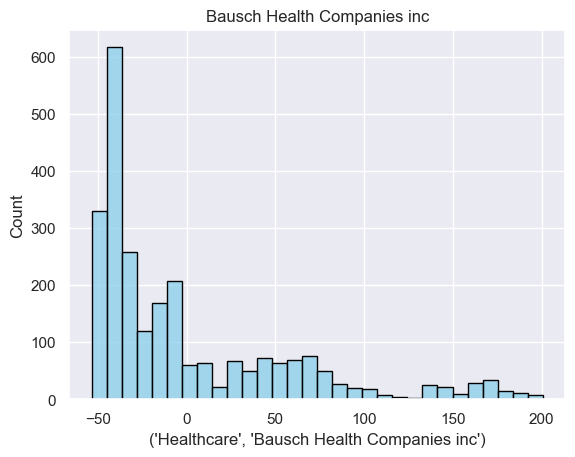

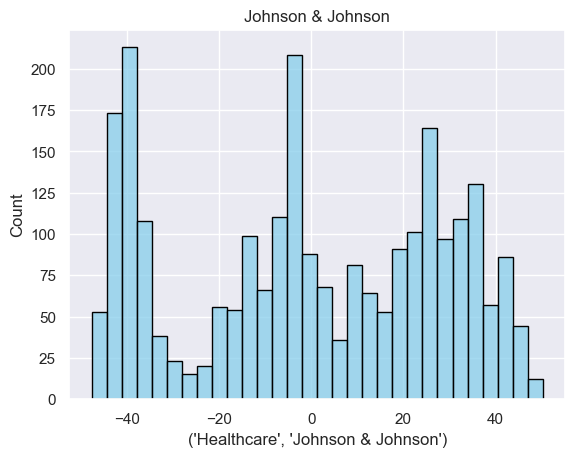

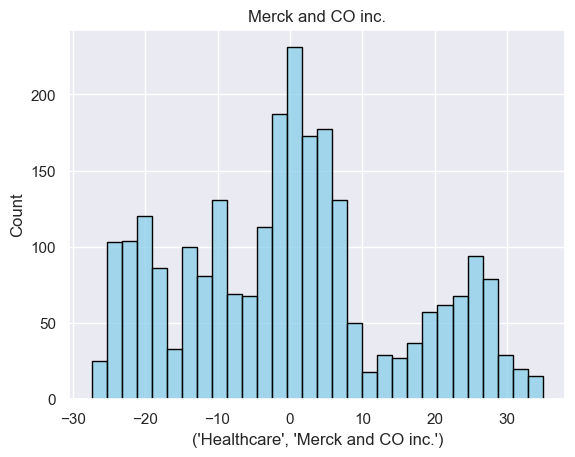

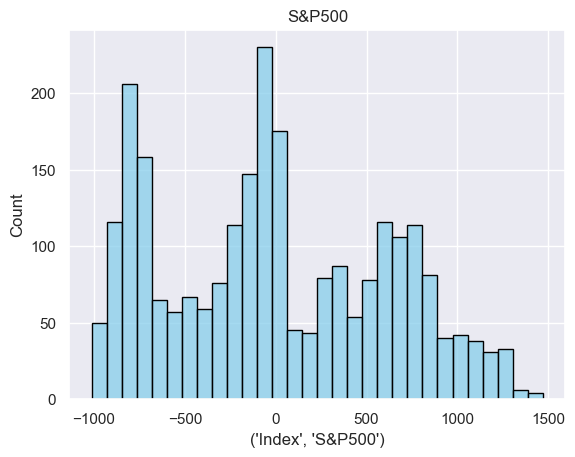

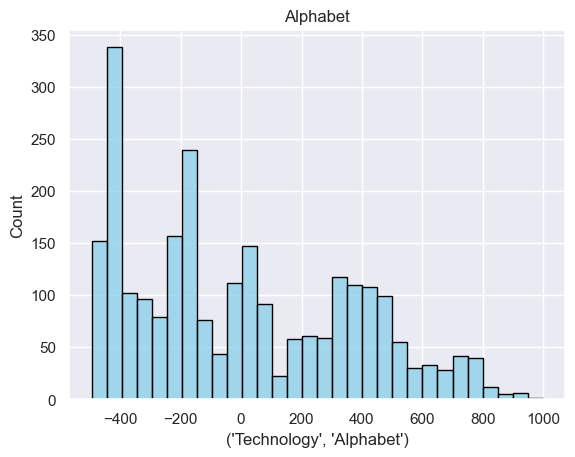

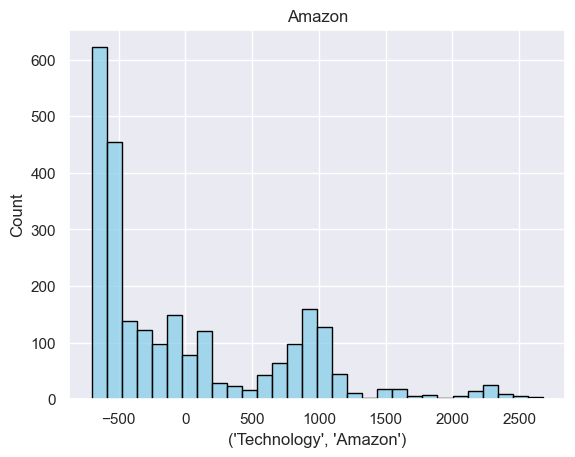

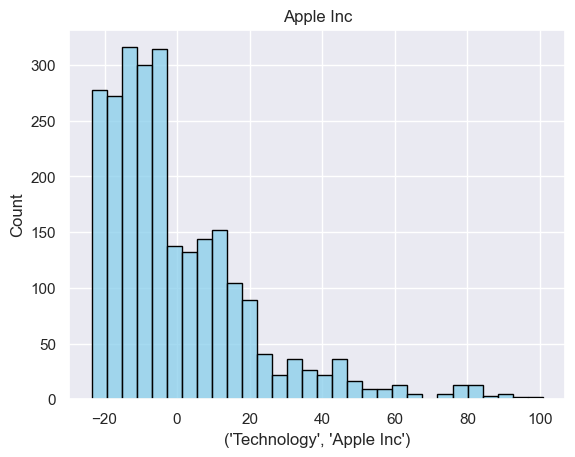

In [38]:
for i,j in prices.columns:
    mean=np.mean(prices[i,j])
    deviation=prices[i,j]-mean
    sns.histplot(deviation,bins=30, color='skyblue', edgecolor='black')
    plt.title(j)
    plt.show()

## Highest And Least Prices Of Each Company's Stock Between Oct 2010 to Sep 2020

In [39]:
prices.agg(['min','max'])

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
min                     11.620000                    4.000000   
max                    100.239998                   58.470001   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
min                       3.780000      6.670000      5.480000     87.699997   
max                      60.299999     46.513672     62.624046    273.380005   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
min                             8.510000         57.660000         29.809999   
max                           262.519989        155.509995         92.040001   

Industry            Index   Technology                           
Company Name       S&P500     Alphabet       Amazon   Apple Inc  
min           1099.229980   236.553345   153.029999    9.951428  
max           3580.840088  1728.280029  3531.449951  134.179993

In [40]:
price_change=prices.pct_change()
price_change.dropna(inplace=True)

In [41]:
price_change.head()

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2010-10-04              -0.024503                   -0.018299   
2010-10-05               0.005971                    0.012061   
2010-10-06              -0.002251                    0.000000   
2010-10-07              -0.046154                    0.001083   
2010-10-08               0.036344                   -0.018398   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2010-10-04               -0.035235     -0.007401     -0.015965     -0.007651   
2010-10-05                0.017391      0.029590      0.042404      0.020468   
2010-10-06                0.020513      0.006563      0.012204      0.008491   
2010-10-07                0.030151      0.005396     -0.010484      0.001790   
2010-10-08                0.000000     -0.015653     -0.003002      0.010257   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2010-10-04                      0.004660         -0.001296         -0.002186   
2010-10-05                      0.016621          0.018323          0.013691   
2010-10-06                      0.014829          0.006529         -0.000270   
2010-10-07                     -0.003372          0.000158         -0.008106   
2010-10-08                      0.009023          0.000158          0.005448   

Industry         Index Technology                      
Company Name    S&P500   Alphabet    Amazon Apple Inc  
Date                                                   
2010-10-04   -0.008035  -0.006221  0.010930 -0.013734  
2010-10-05    0.020861   0.030401  0.035266  0.036965  
2010-10-06   -0.000672  -0.007209 -0.034003  0.000865  
2010-10-07   -0.001647  -0.008122  0.005599  0.000104  
2010-10-08    0.006122   0.011962 -0.004607  0.016769

## Distribution Of Daily Price Changes Of Each Stock

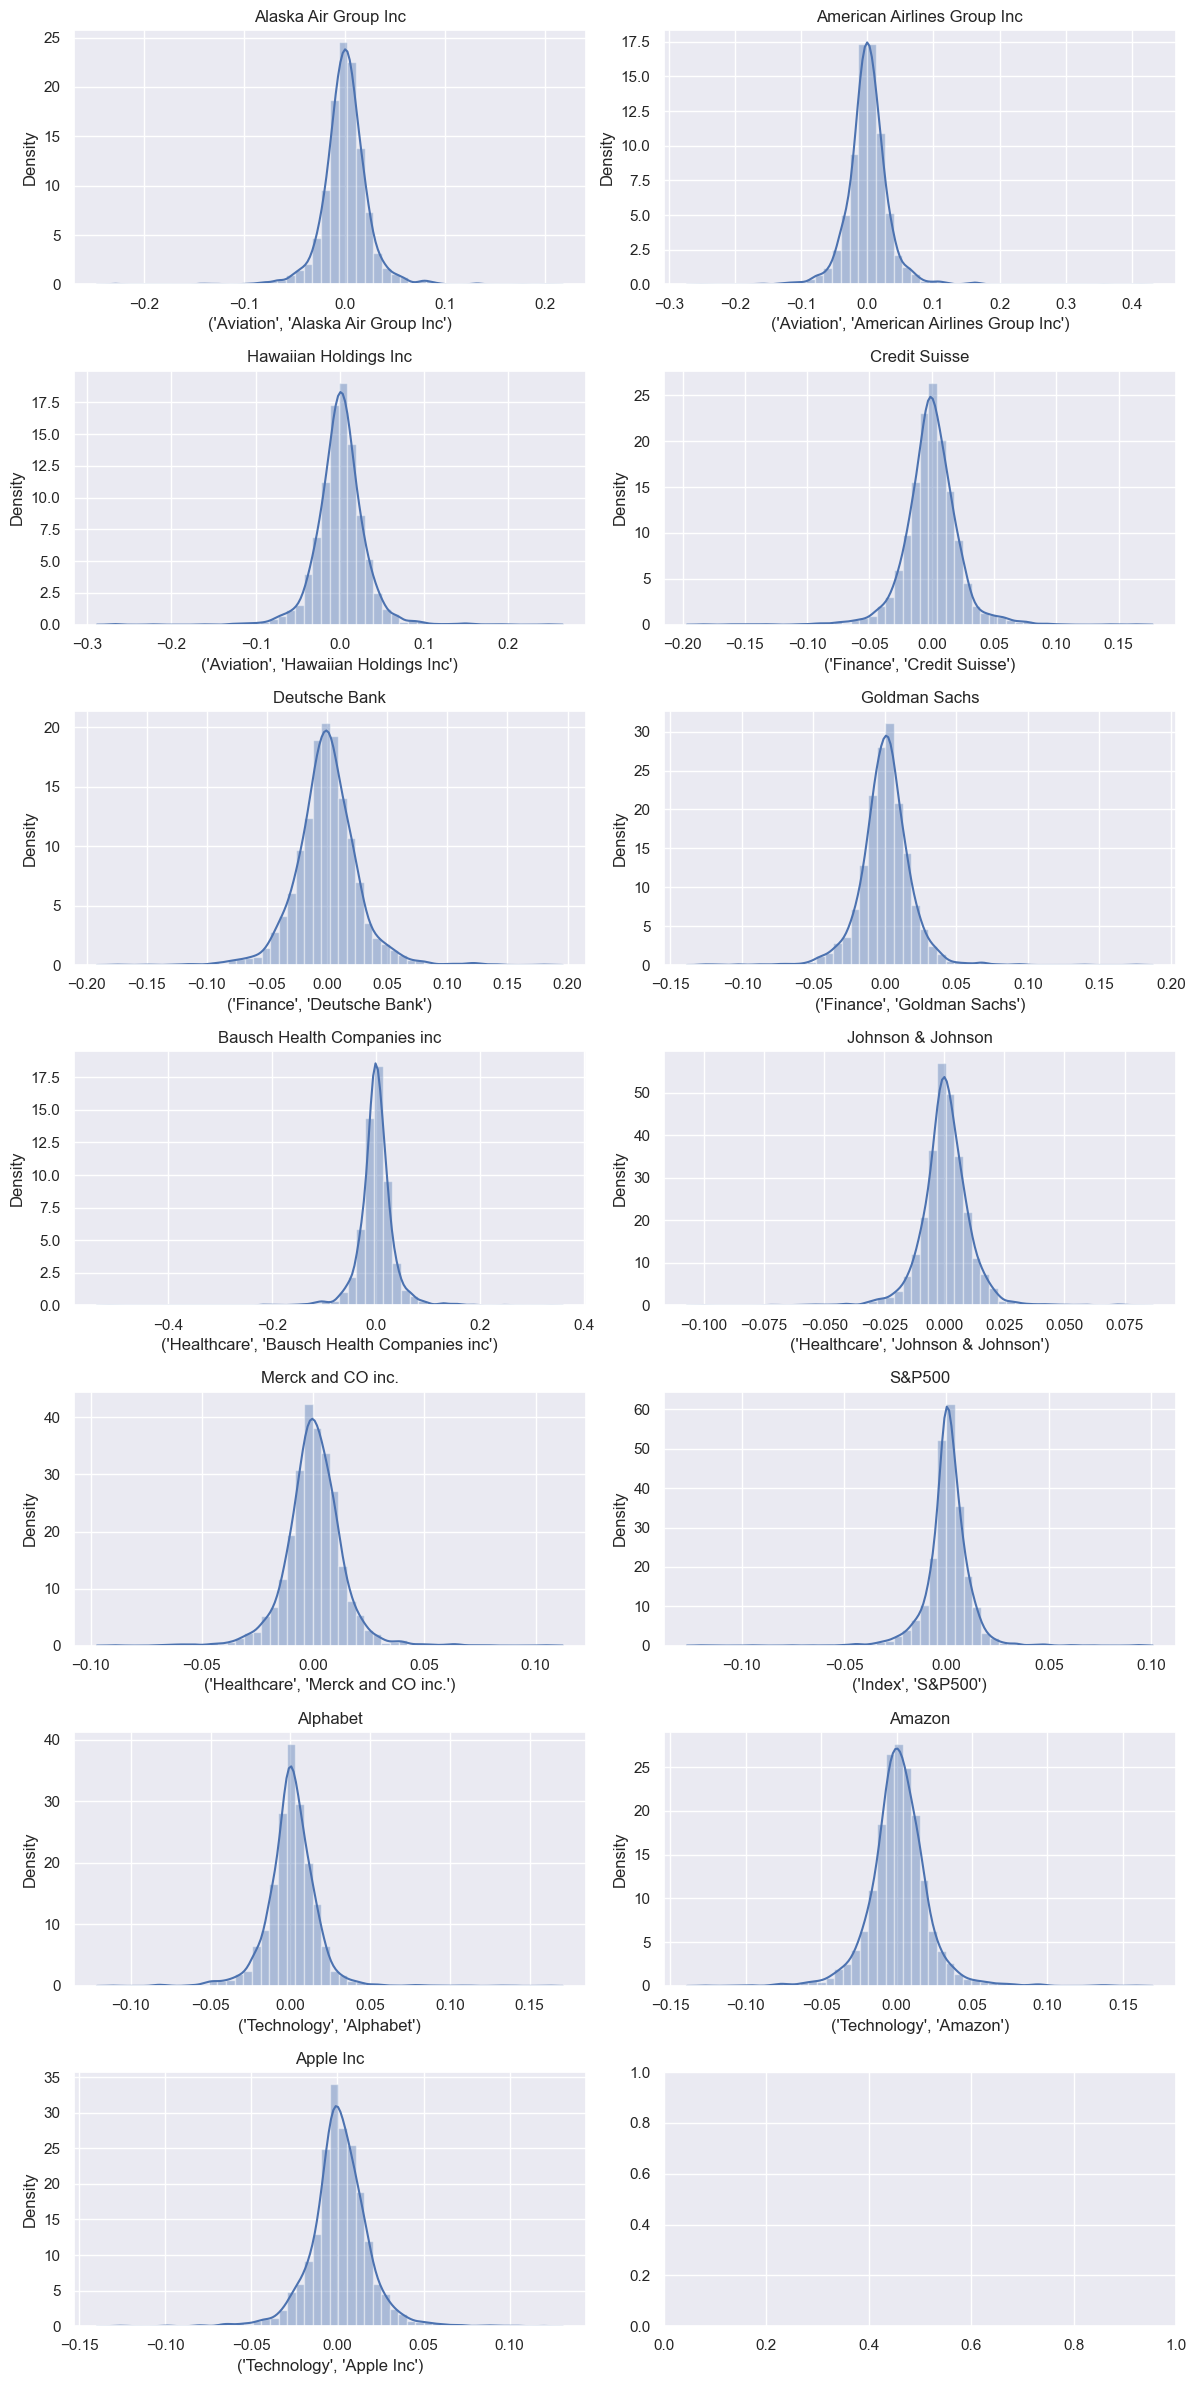

In [42]:
fig, axes = plt.subplots(7, 2, figsize=(12, 24))  # Create a figure with 7 rows and 2 columns of subplots

for (i, j), ax in zip(prices.columns, axes.flatten()):
    sns.distplot(price_change[i, j], ax=ax)
    ax.set_title(j)
    
plt.tight_layout()    
plt.show()
    

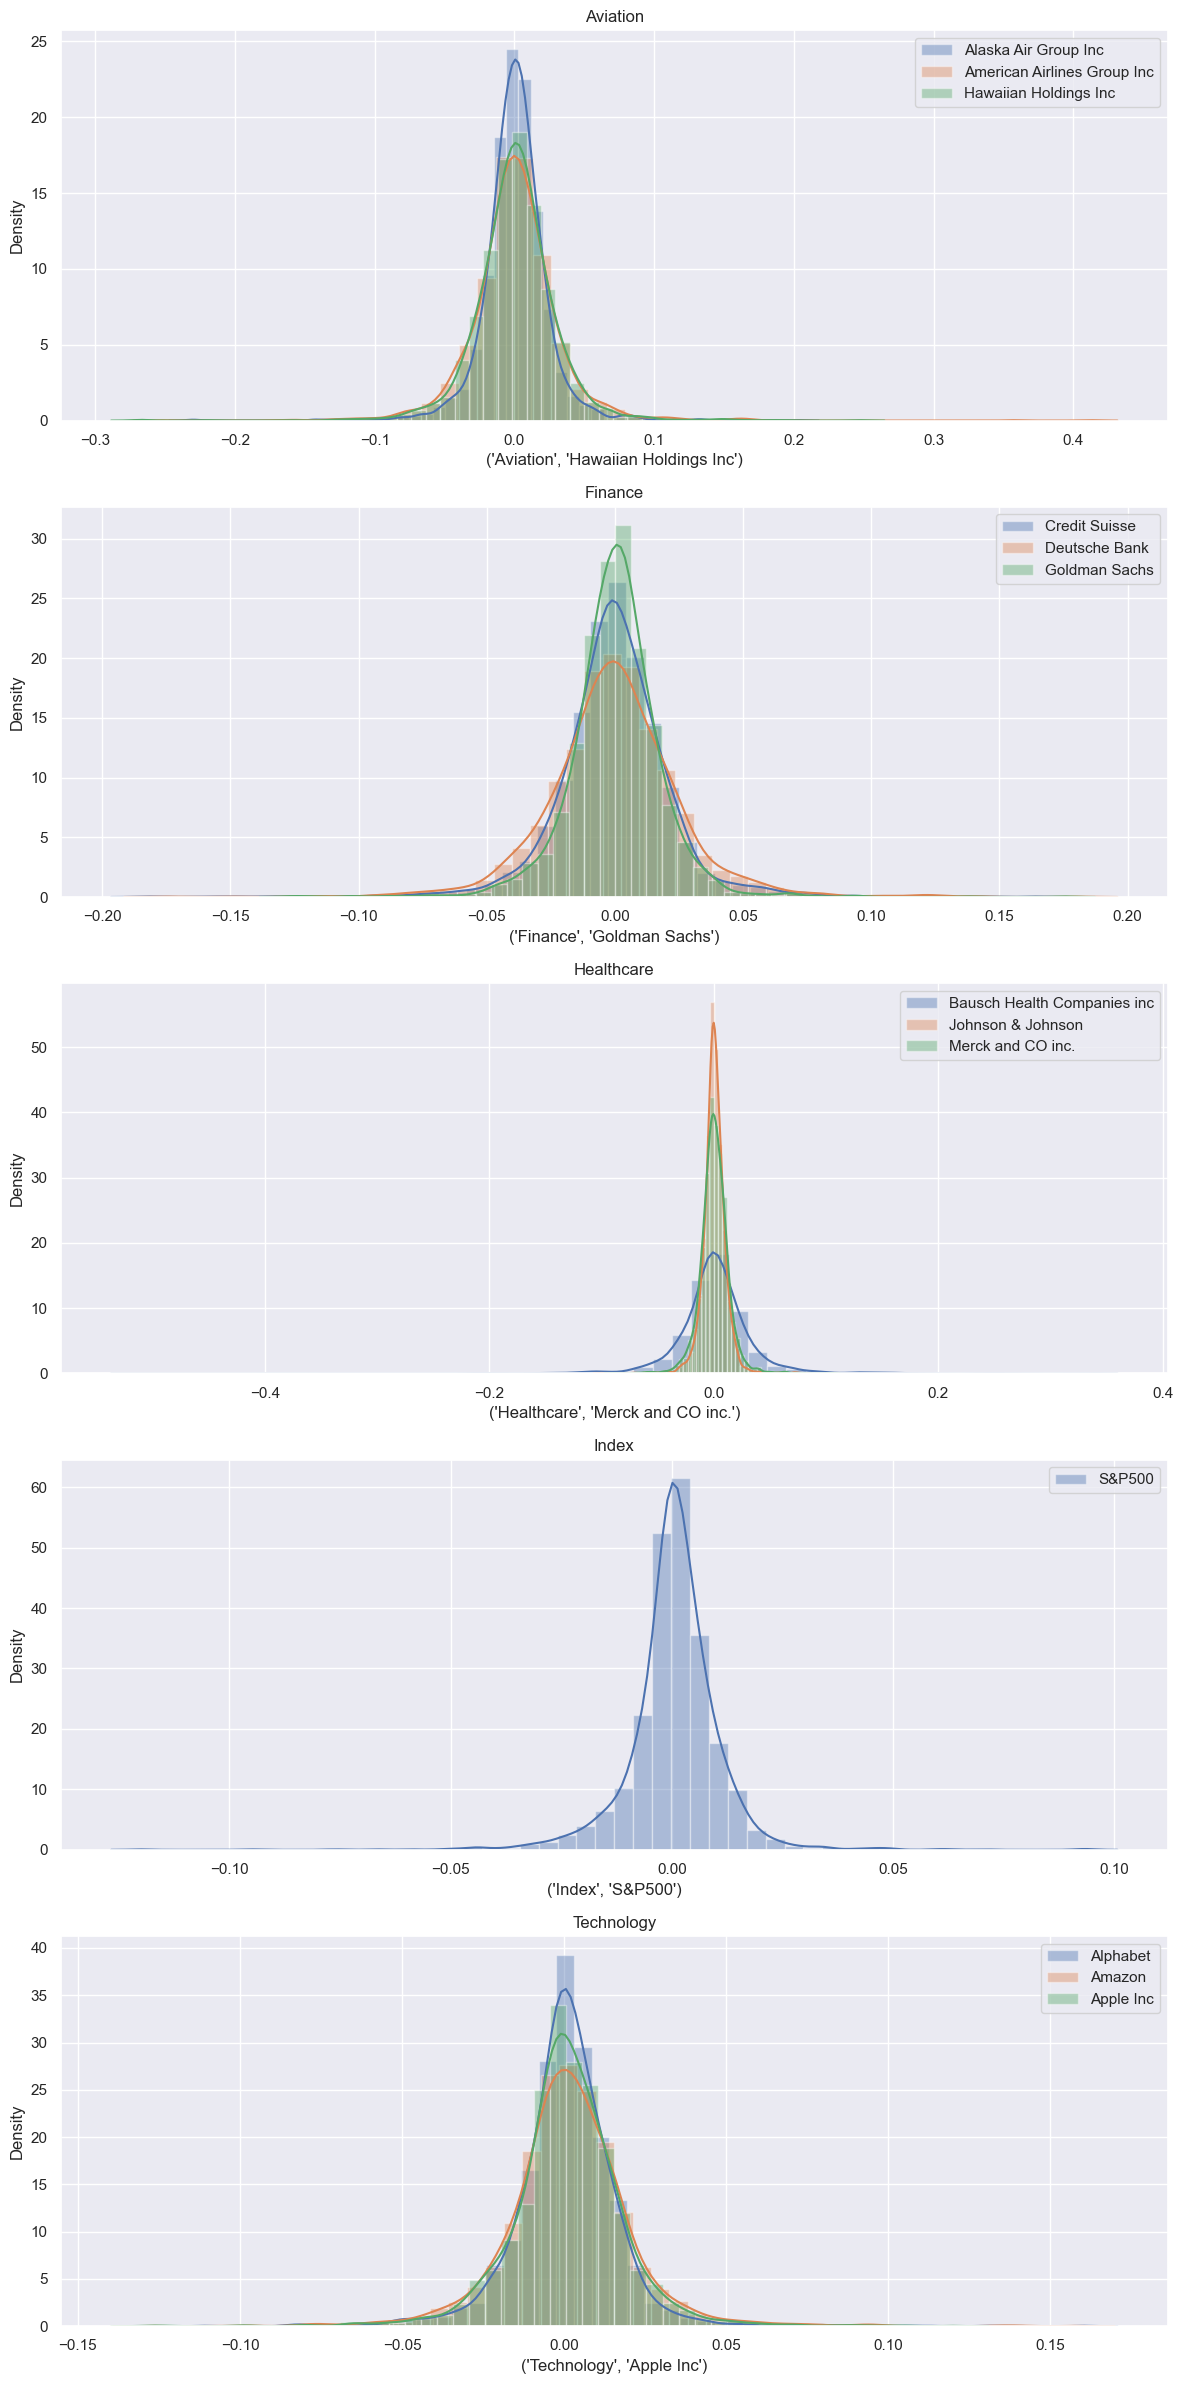

In [43]:
fig, axes = plt.subplots(5, 1, figsize=(12, 24))
for i,ax in  zip(dict(prices.columns).keys(), axes.flatten()):
    for j in prices[i].columns:
        sns.distplot(price_change[i, j], hist=True,label=j,ax=ax)
        ax.set_title(i)
        ax.legend()
plt.tight_layout()
plt.show()

In [44]:
# Risk in each Stock considering that they are indiependent
Risk=price_change.std().reset_index()
Risk.columns=['Industry', 'Company Name', 'Risk']
Risk=Risk.sort_values(by='Risk',ascending=True).reset_index().drop('index',axis=1)
Risk['Risk_Rank']=Risk.index+1
Risk

Industry                 Company Name      Risk  Risk_Rank
0   Healthcare            Johnson & Johnson  0.010847          1
1        Index                       S&P500  0.010934          2
2   Healthcare            Merck and CO inc.  0.013049          3
3   Technology                     Alphabet  0.016288          4
4   Technology                    Apple Inc  0.017719          5
5      Finance                Goldman Sachs  0.018331          6
6   Technology                       Amazon  0.019889          7
7      Finance                Credit Suisse  0.022206          8
8     Aviation         Alaska Air Group Inc  0.023562          9
9      Finance                Deutsche Bank  0.026374         10
10    Aviation        Hawaiian Holdings Inc  0.030147         11
11    Aviation  American Airlines Group Inc  0.032726         12
12  Healthcare  Bausch Health Companies inc  0.035700         13

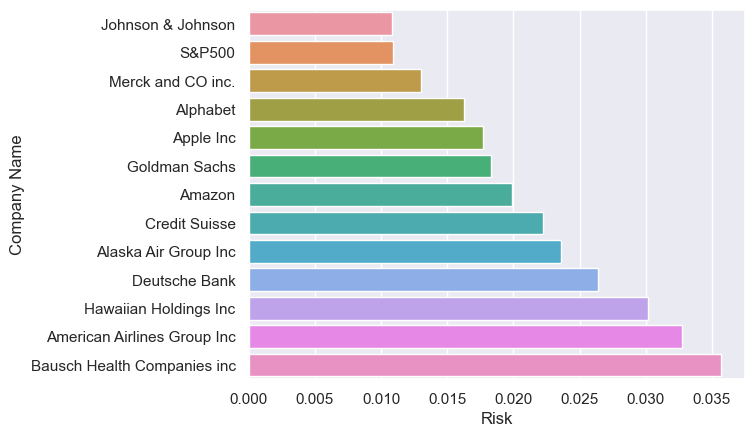

In [45]:
sns.barplot(data=Risk,y='Company Name',x='Risk')
plt.show()

In [46]:
# Mean Daily Returns
Returns=price_change.mean().reset_index()
Returns.columns=['Industry', 'Company Name', 'Avg_Daily_Returns']
Returns=Returns.sort_values(by='Avg_Daily_Returns',ascending=False).reset_index().drop('index',axis=1)
Returns['Avg_Annual_Returns']=Returns['Avg_Daily_Returns']*252
Returns['Returns_Rank']=Returns.index+1
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  
0             0.352201             1  
1             0.284164             2  
2             0.206023             3  
3             0.192824             4  
4             0.178792             5  
5             0.160489             6  
6             0.122966             7  
7             0.116973             8  
8             0.103385             9  
9             0.103009            10  
10            0.073212            11  
11           -0.081888            12  
12           -0.096102            13

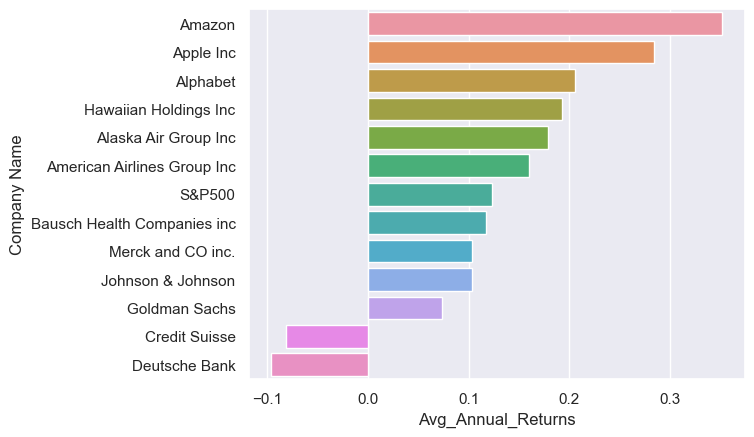

In [47]:
sns.barplot(data=Returns,y='Company Name',x='Avg_Annual_Returns')
plt.show()

In [48]:
# Cummulative Returns in the given time period
Cummulative=(price_change+1).cumprod()
Cummulative.tail()

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2020-09-24               2.868046                    1.266954   
2020-09-25               2.948383                    1.322928   
2020-09-28               3.015867                    1.373520   
2020-09-29               2.945973                    1.318622   
2020-09-30               2.942760                    1.322928   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2020-09-24                2.080537      0.227819      0.154196      1.320989   
2020-09-25                2.147651      0.224503      0.152104      1.319905   
2020-09-28                2.244966      0.234450      0.160280      1.347800   
2020-09-29                2.157718      0.232792      0.157238      1.332363   
2020-09-30                2.162752      0.236107      0.159710      1.360664   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2020-09-24                      0.591068          2.342834          2.271858   
2020-09-25                      0.594175          2.358866          2.265847   
2020-09-28                      0.593010          2.382348          2.261202   
2020-09-29                      0.577864          2.381538          2.237705   
2020-09-30                      0.603495          2.411012          2.266393   

Industry         Index Technology                        
Company Name    S&P500   Alphabet     Amazon  Apple Inc  
Date                                                     
2020-09-24    2.832382   5.455057  19.646021  10.725471  
2020-09-25    2.877635   5.518724  20.136164  11.127849  
2020-09-28    2.923995   5.593430  20.649599  11.393459  
2020-09-29    2.909923   5.611801  20.459825  11.307234  
2020-09-30    2.933941   5.612832  20.484873  11.477700

In [49]:
Risk_return=pd.merge(Risk[['Company Name','Risk']],Returns[['Company Name','Avg_Annual_Returns']],on='Company Name')
Risk_return['Annual_Risk']=(252**0.5)*Risk_return['Risk']
Risk_return

Company Name      Risk  Avg_Annual_Returns  Annual_Risk
0             Johnson & Johnson  0.010847            0.103009     0.172187
1                        S&P500  0.010934            0.122966     0.173574
2             Merck and CO inc.  0.013049            0.103385     0.207142
3                      Alphabet  0.016288            0.206023     0.258561
4                     Apple Inc  0.017719            0.284164     0.281273
5                 Goldman Sachs  0.018331            0.073212     0.290996
6                        Amazon  0.019889            0.352201     0.315735
7                 Credit Suisse  0.022206           -0.081888     0.352509
8          Alaska Air Group Inc  0.023562            0.178792     0.374043
9                 Deutsche Bank  0.026374           -0.096102     0.418676
10        Hawaiian Holdings Inc  0.030147            0.192824     0.478573
11  American Airlines Group Inc  0.032726            0.160489     0.519504
12  Bausch Health Companies inc  0.035700            0.116973     0.566714

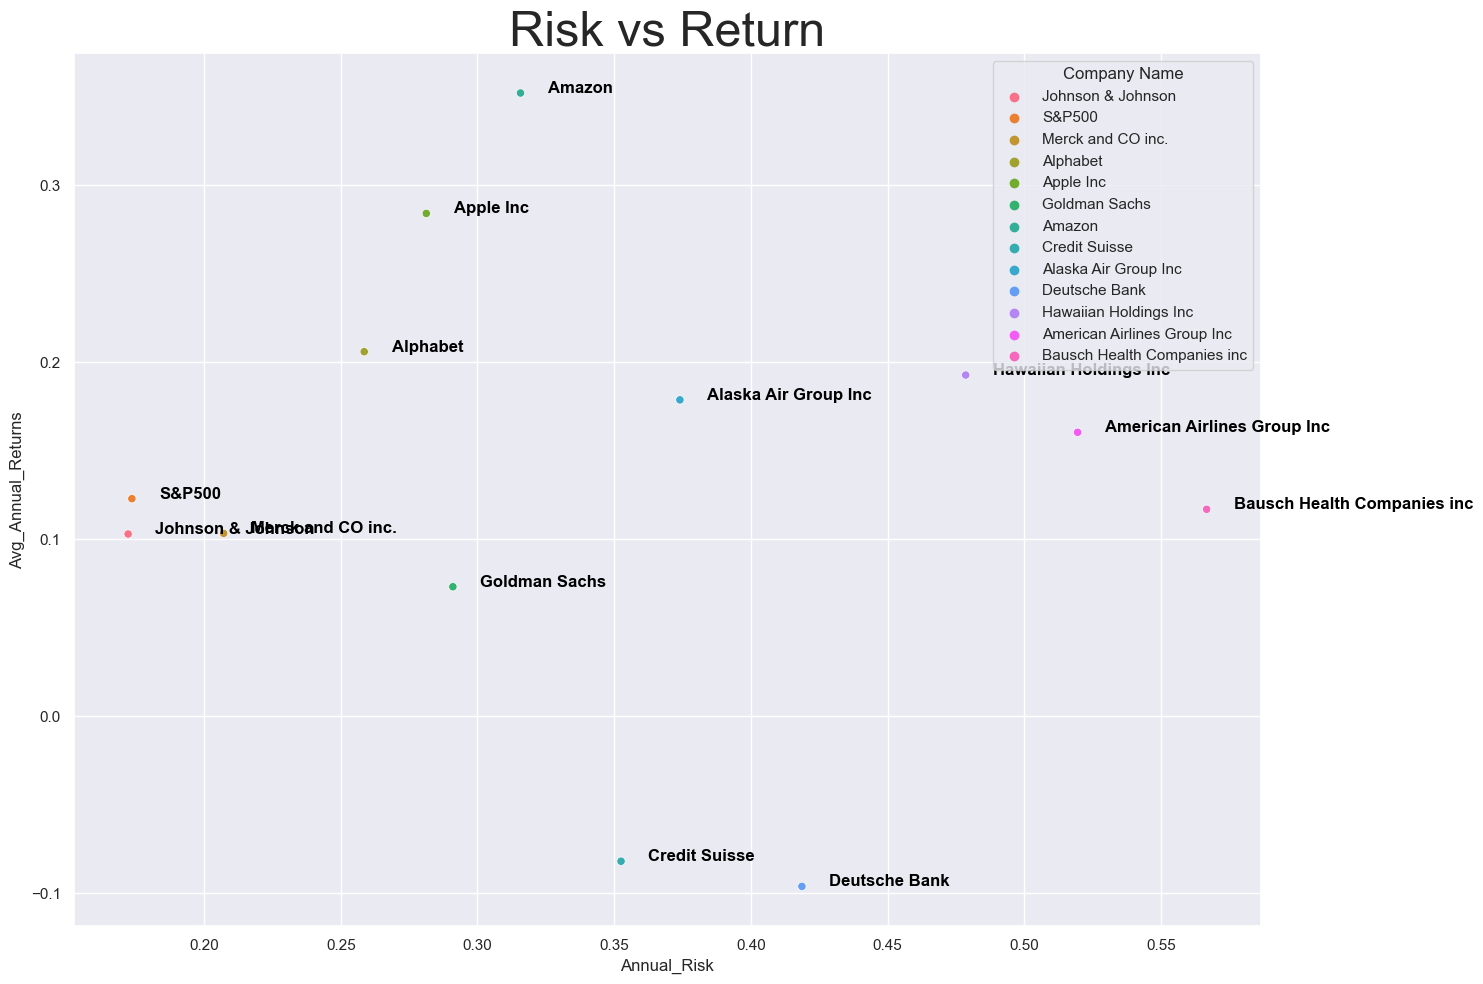

In [50]:
plt.figure(figsize=[15,10])
# Create the scatter plot
scatterplot = sns.scatterplot(data=Risk_return,x='Annual_Risk',y='Avg_Annual_Returns',hue='Company Name',legend='brief')

# Add annotations for each point
for line in range(0, Risk.shape[0]):
     scatterplot.text(Risk_return['Annual_Risk'][line]+0.01, Risk_return['Avg_Annual_Returns'][line], 
                      Risk_return['Company Name'][line], horizontalalignment='left', 
                      size='medium', color='black', weight='semibold')

plt.title('Risk vs Return',size=35)
plt.tight_layout()
# Show the plot
plt.show()

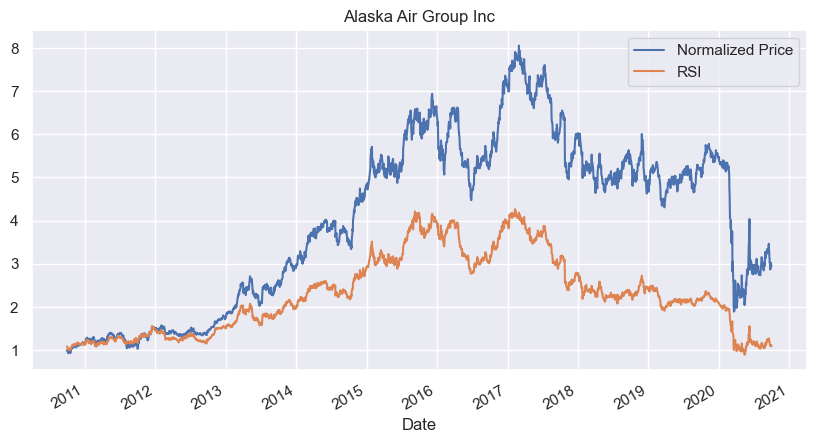

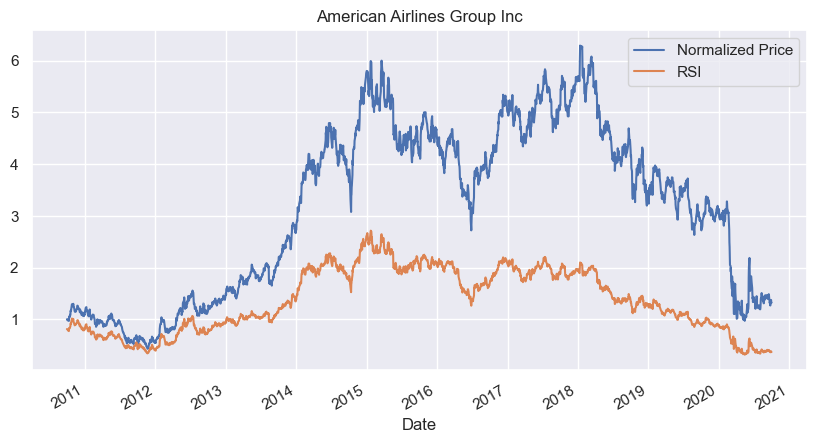

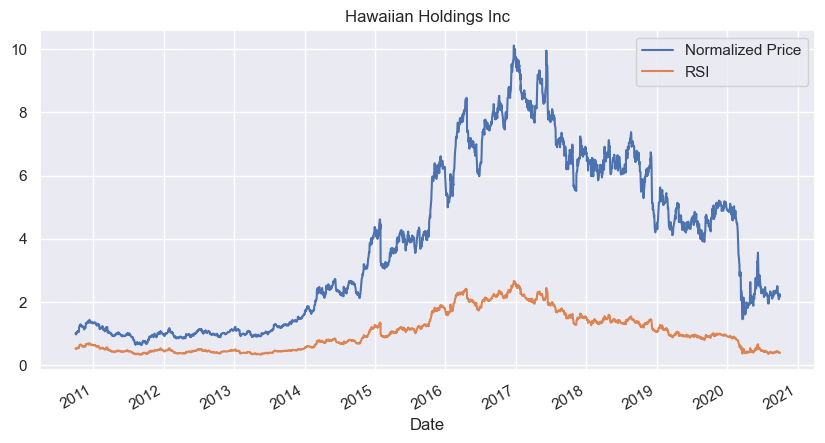

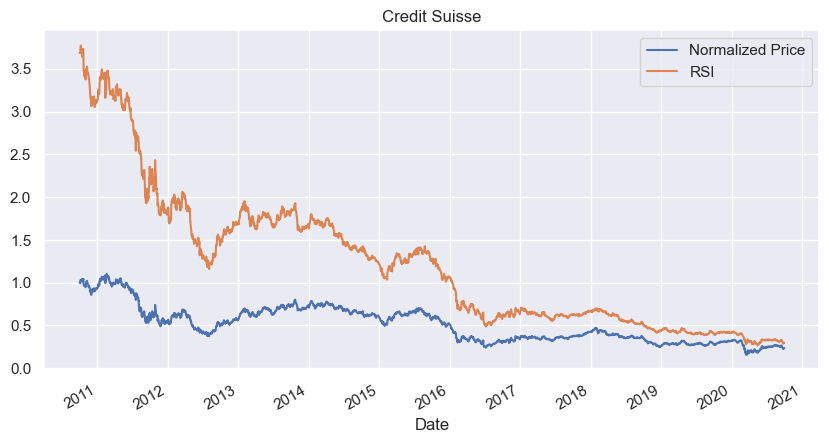

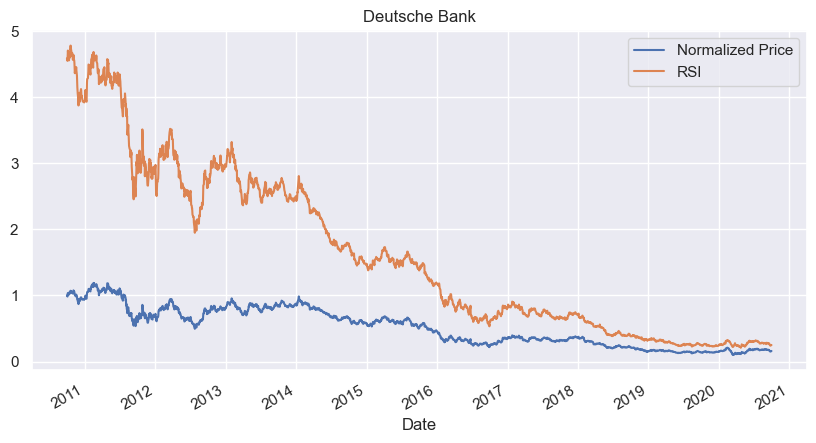

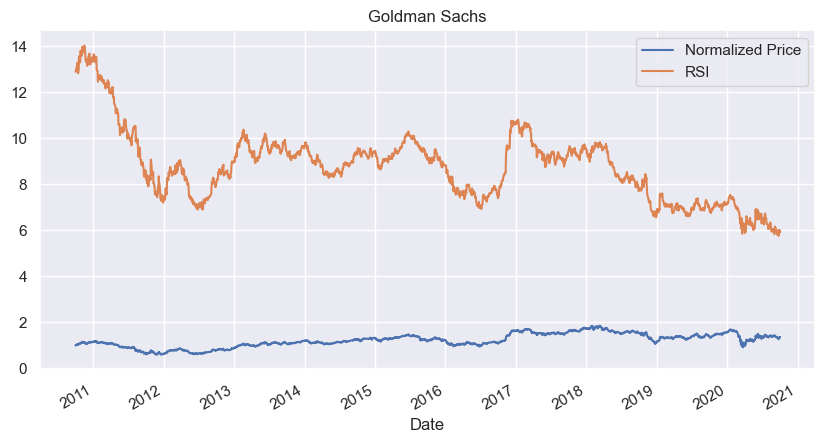

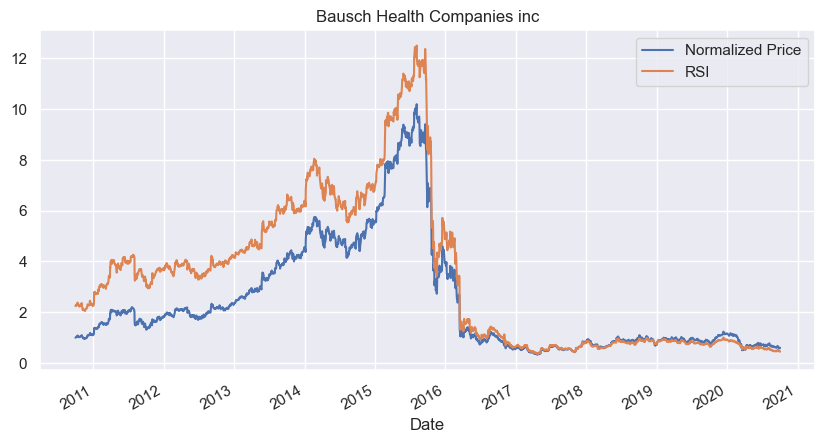

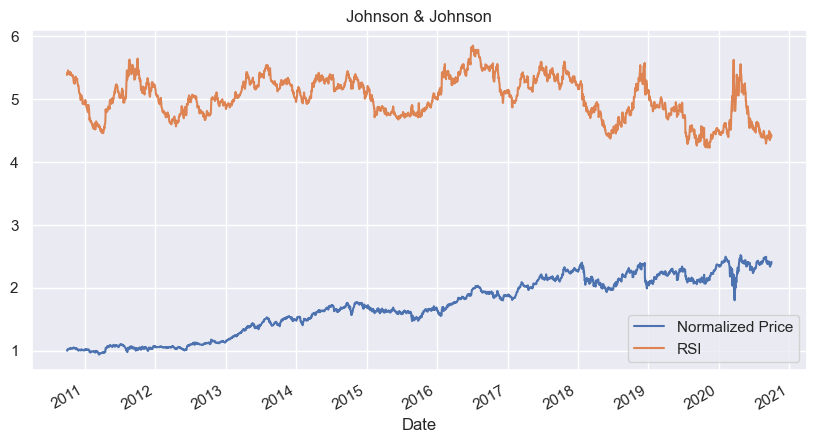

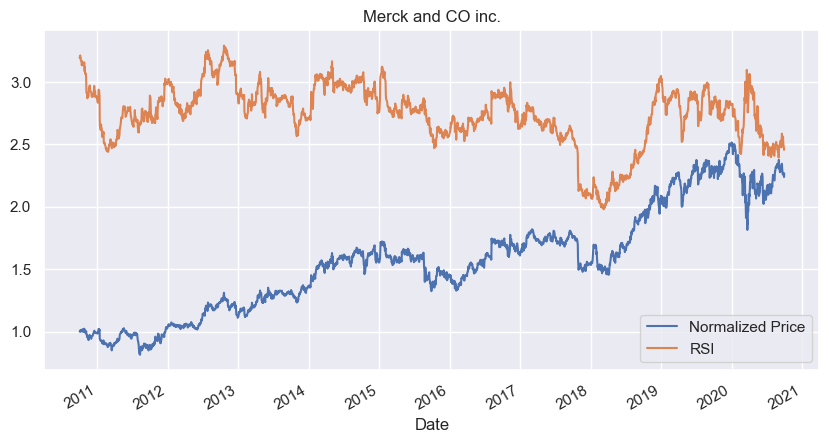

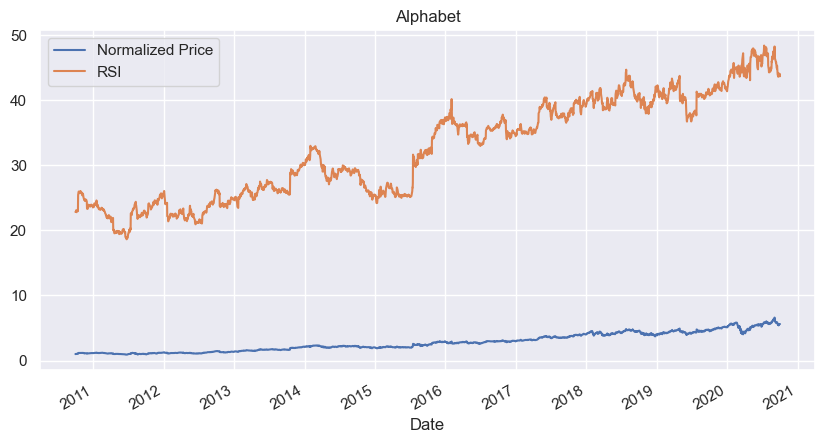

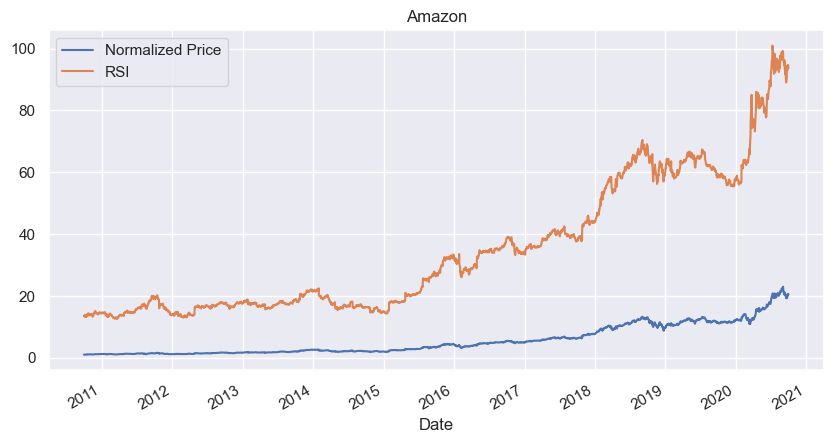

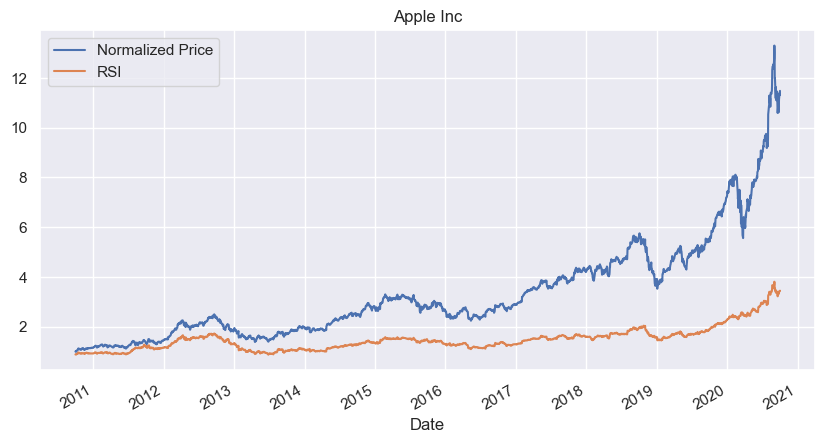

In [51]:
#RSI for each stock
for i,j in prices.columns:
    if i!='Index':
        plt.figure(figsize=[10,5])
        prices_normalized[i,j].plot(label='Normalized Price')
        (100*prices[i,j]/prices['Index','S&P500']).plot(label='RSI')
        plt.title(j)
        plt.legend()
        plt.show()

In [52]:
RSI=prices.copy()
for i,j in prices.columns:
    if i != 'Index':
        RSI[i,j]=prices[i,j]/prices['Index','S&P500']
RSI.head()        

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2010-10-01               0.010859                    0.008105   
2010-10-04               0.010679                    0.008021   
2010-10-05               0.010523                    0.007952   
2010-10-06               0.010507                    0.007957   
2010-10-07               0.010038                    0.007979   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2010-10-01                0.005200      0.036839      0.045885      0.128856   
2010-10-04                0.005057      0.036863      0.045518      0.128906   
2010-10-05                0.005040      0.037178      0.046479      0.128856   
2010-10-06                0.005147      0.037447      0.047078      0.130038   
2010-10-07                0.005311      0.037711      0.046661      0.130485   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2010-10-01                      0.022465          0.053872          0.031930   
2010-10-04                      0.022752          0.054238          0.032119   
2010-10-05                      0.022658          0.054103          0.031893   
2010-10-06                      0.023009          0.054493          0.031906   
2010-10-07                      0.022969          0.054591          0.031700   

Industry            Index Technology                      
Company Name       S&P500   Alphabet    Amazon Apple Inc  
Date                                                      
2010-10-01    1146.239990   0.228424  0.134099  0.008803  
2010-10-04    1137.030029   0.228842  0.136663  0.008752  
2010-10-05    1160.750000   0.230980  0.138591  0.008890  
2010-10-06    1159.969971   0.229469  0.133969  0.008904  
2010-10-07    1158.060059   0.227981  0.134941  0.008919

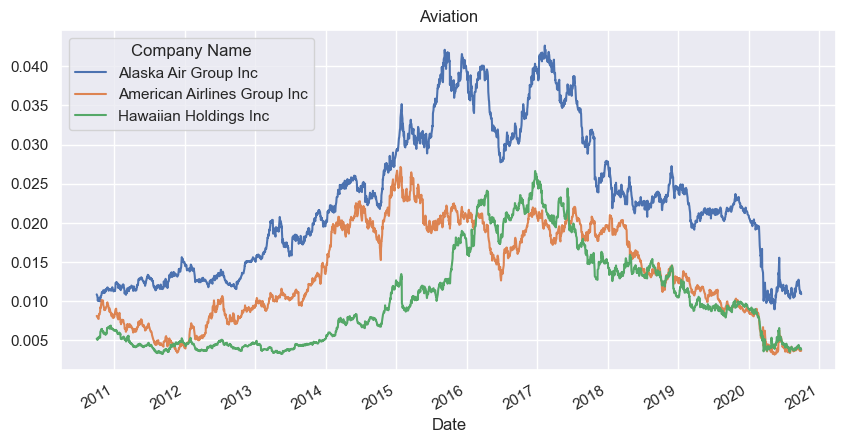

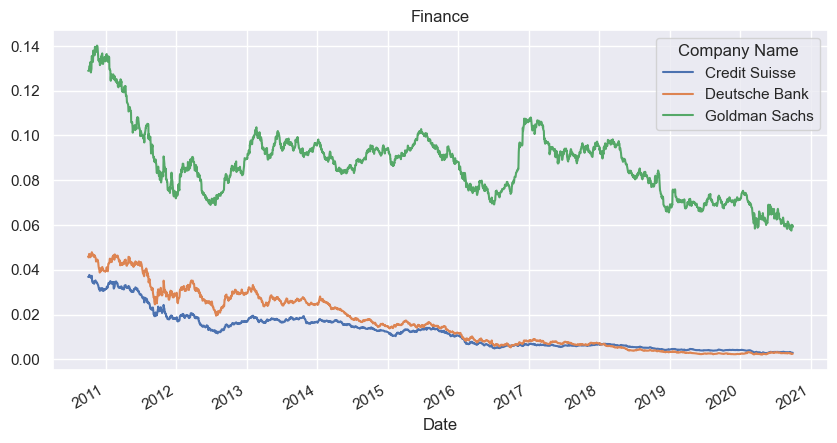

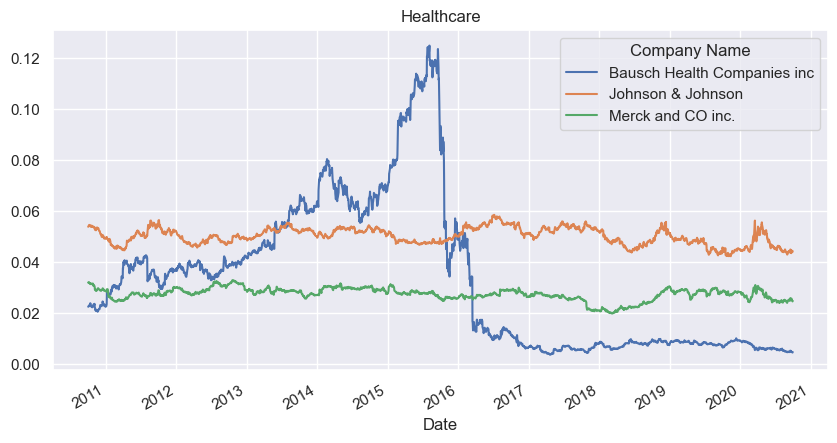

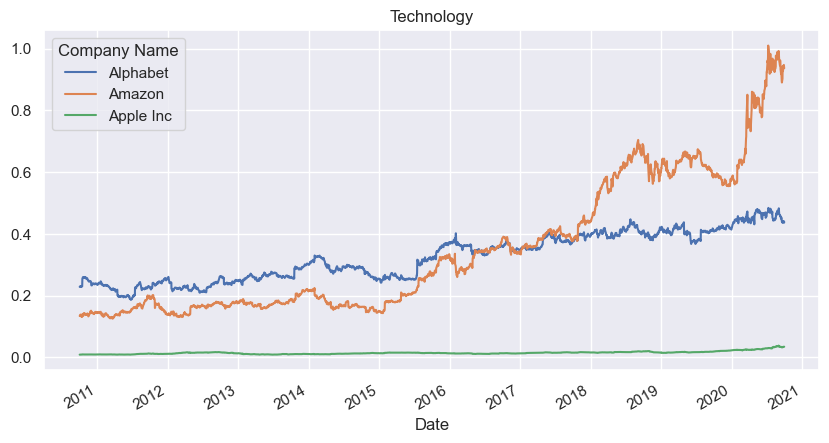

In [53]:
# Industry wise RSI comparision 
for i in dict(prices.columns).keys():
    if i != 'Index':
        (RSI[i]).plot(title = i, figsize=(10,5))
        plt.title(i)
        plt.show()

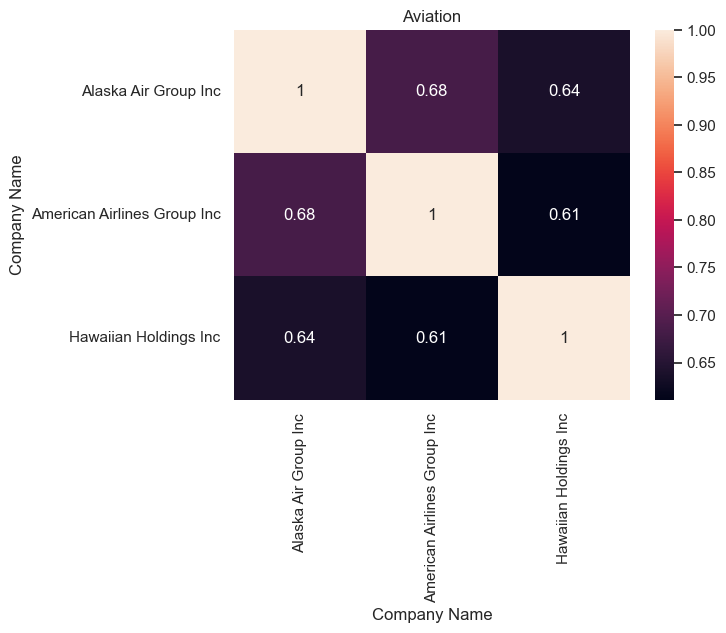

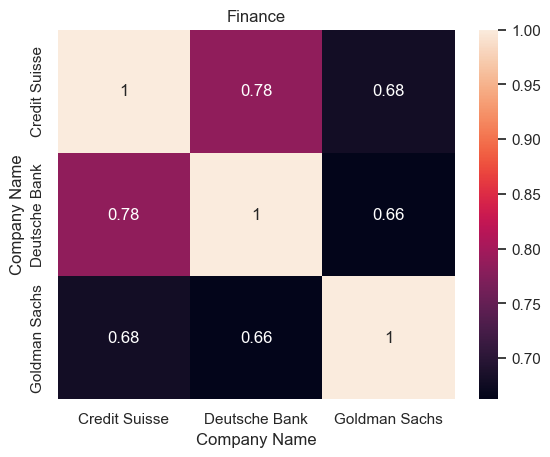

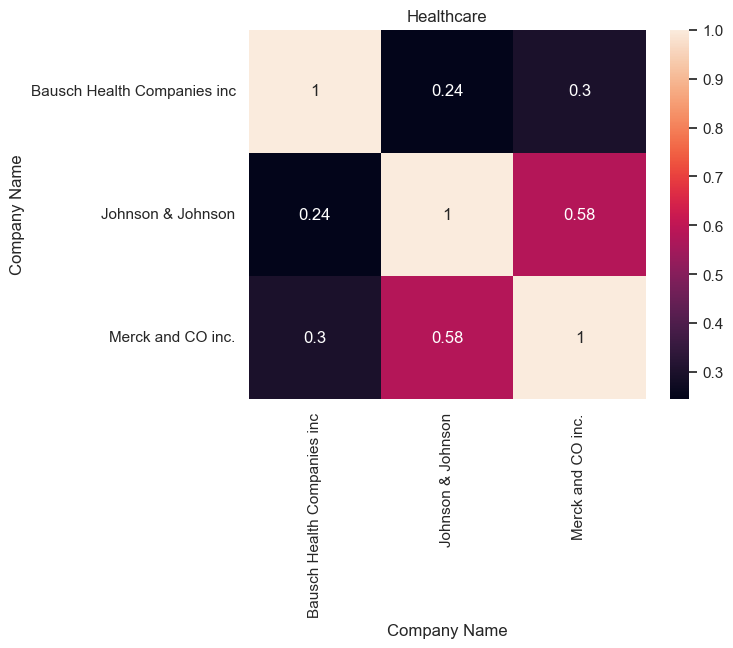

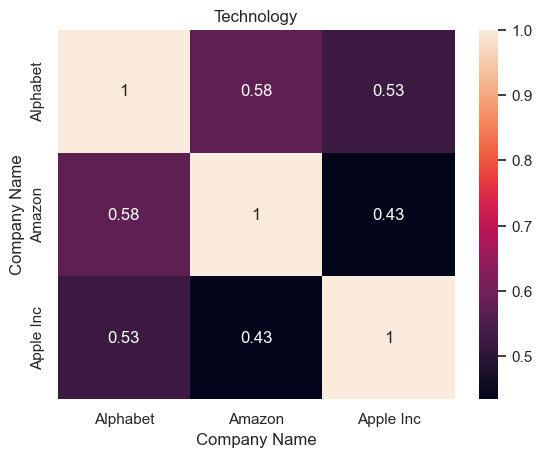

In [54]:
for i in dict(price_change.columns).keys():
    if i!='Index':
        col=[]
        for n,m in price_change.columns:
            if n==i:
                col.append(m)
        sns.heatmap(price_change[i][col].corr(),annot=True)
        plt.title(i)
        plt.show()

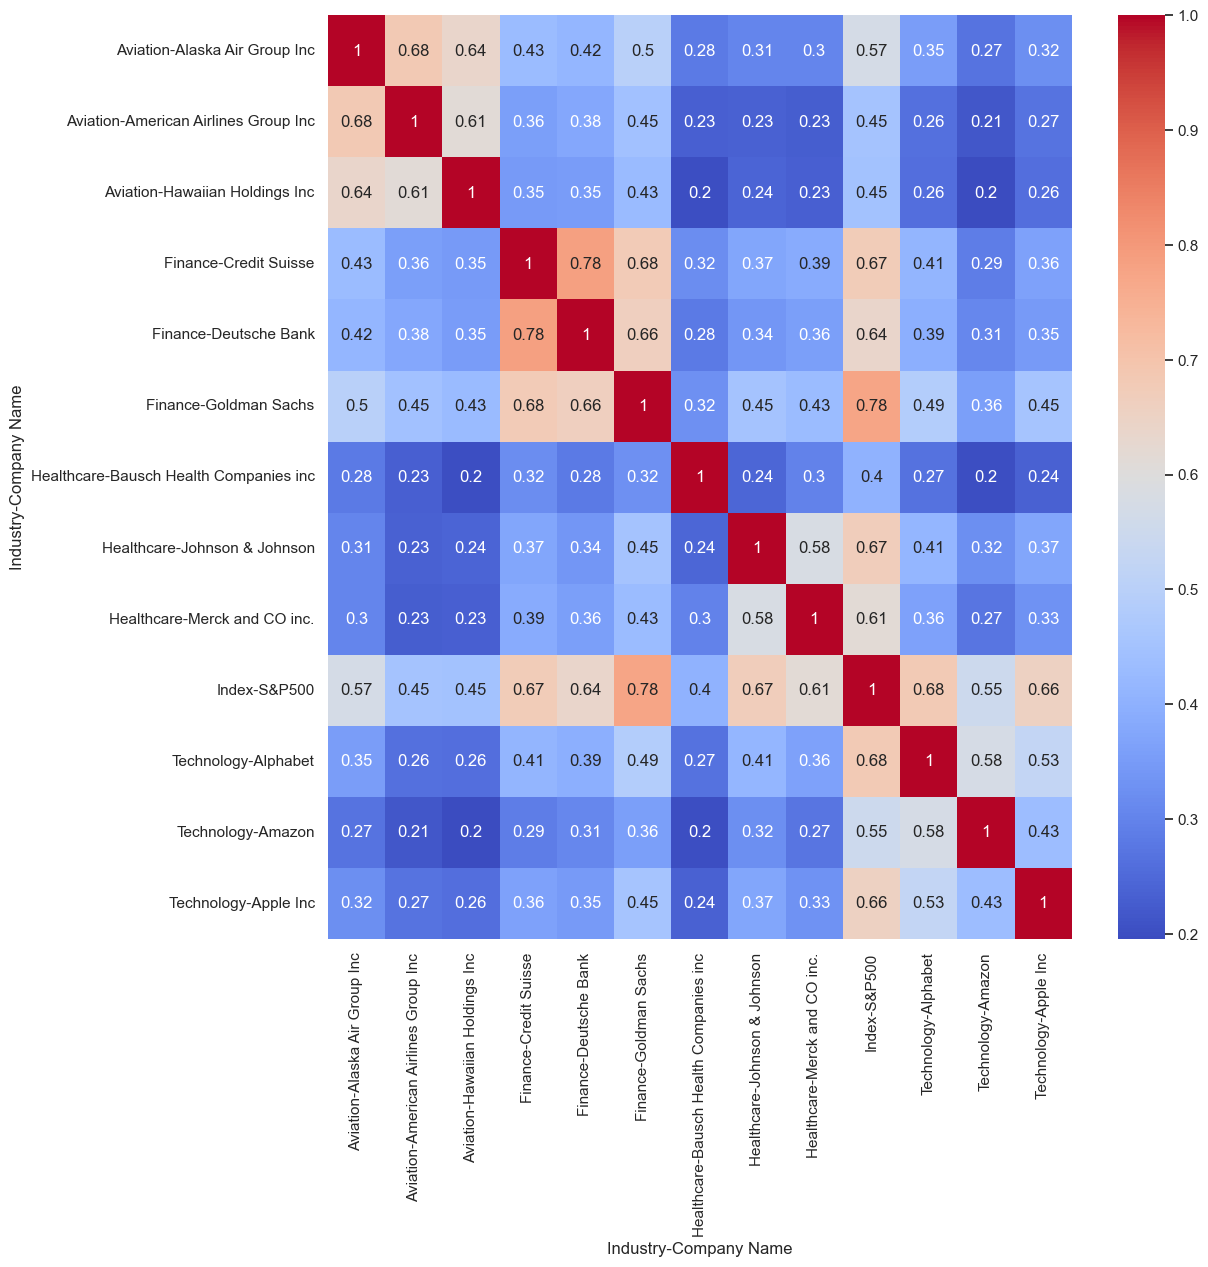

In [55]:
plt.figure(figsize=(12,12))
sns.heatmap(price_change.corr(),annot=True,cmap='coolwarm')
plt.show()

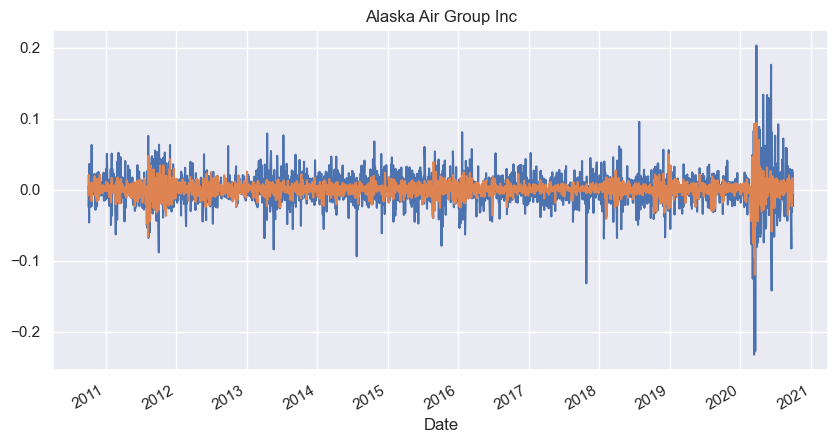

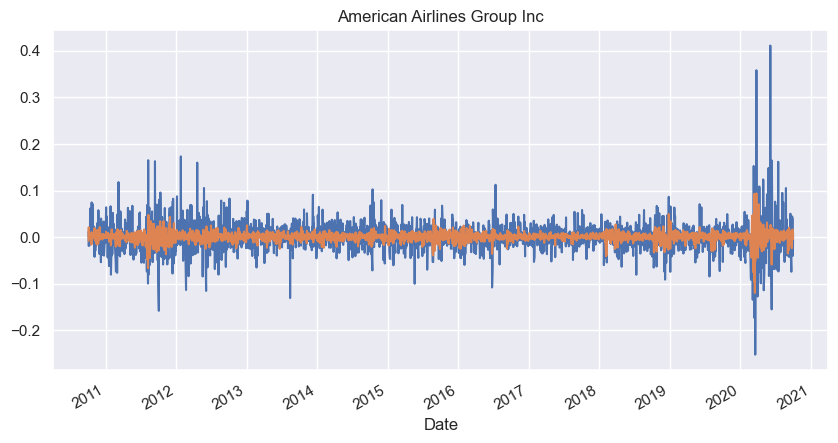

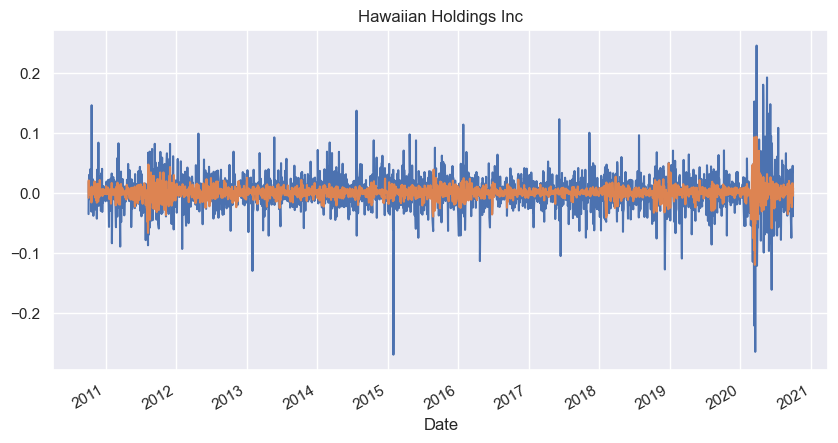

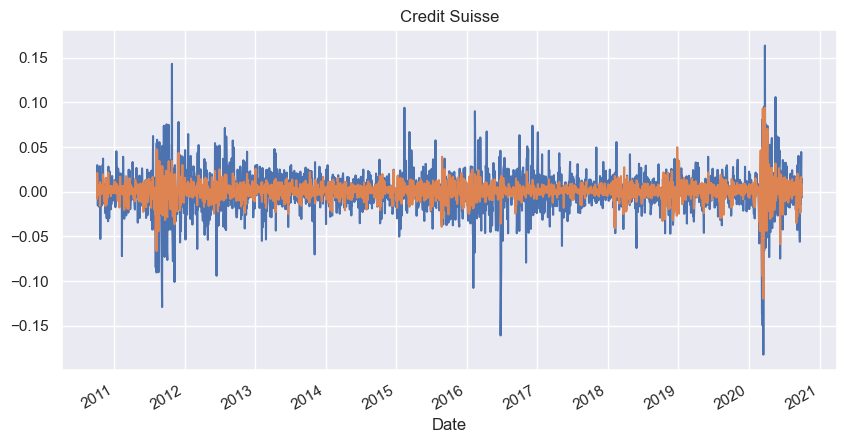

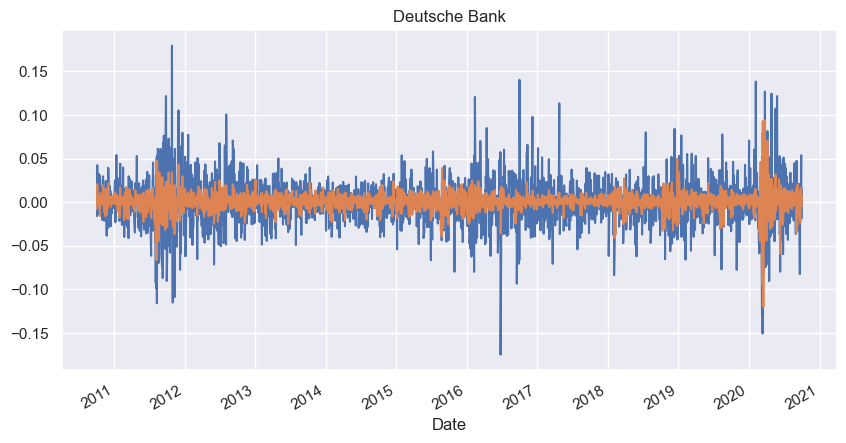

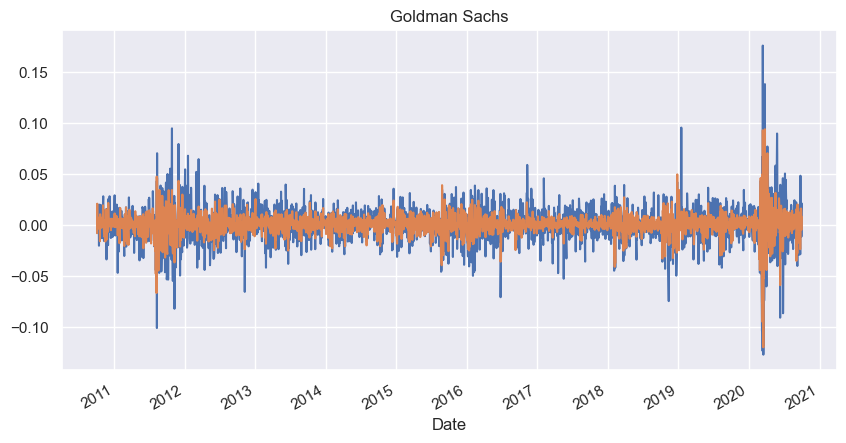

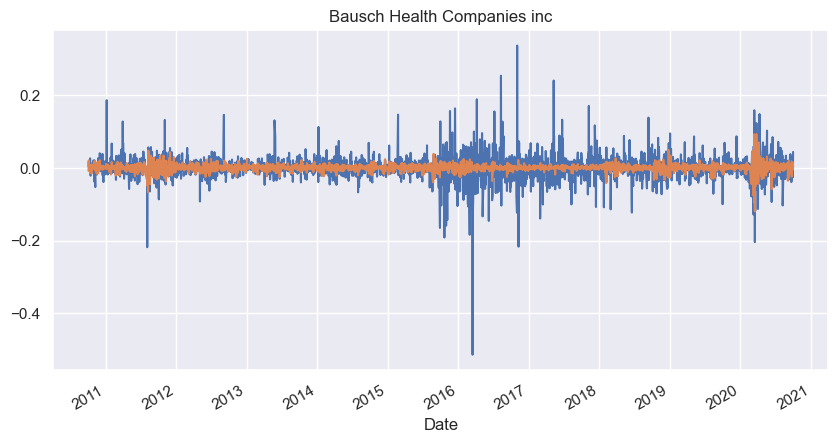

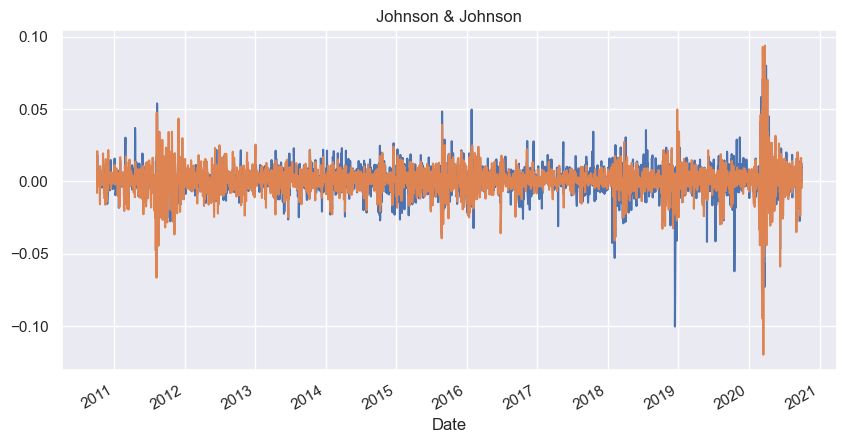

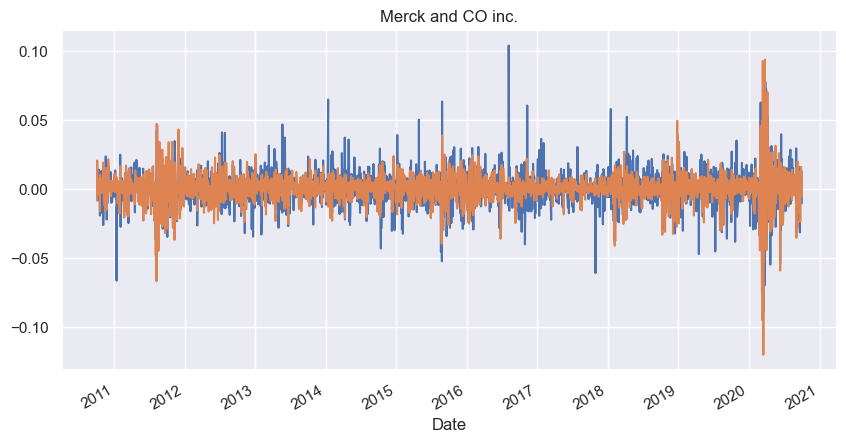

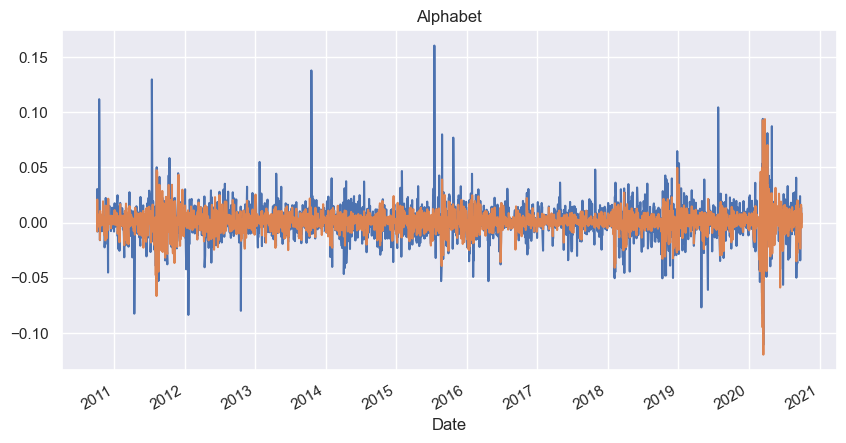

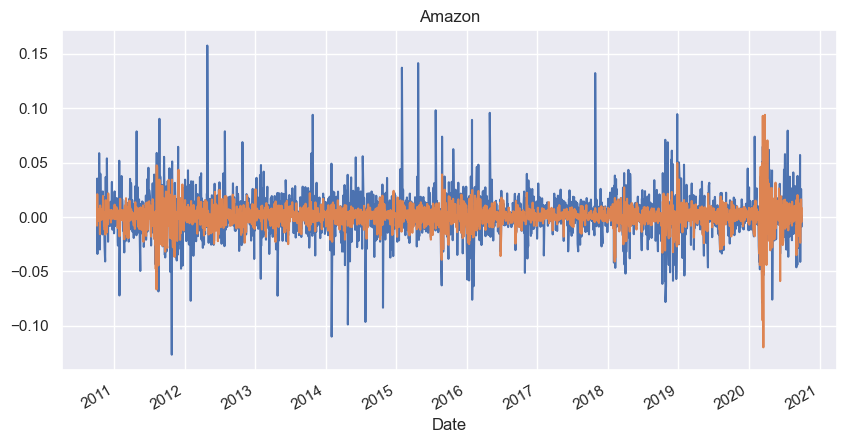

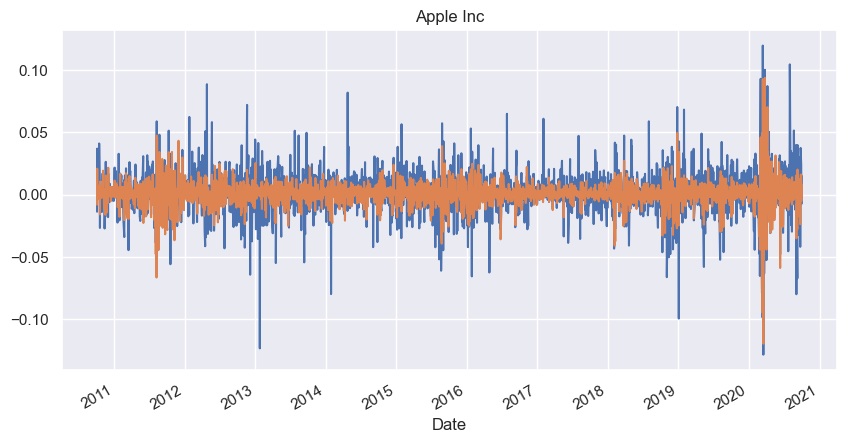

In [56]:
#Comparing the daily returns with market index returns
for i,j in price_change.columns:
    if i!='Index':
        plt.figure(figsize=[10,5])
        price_change[i,j].plot(label=j)
        price_change['Index','S&P500'].plot(label='S&P500')
        plt.title(j)
        plt.show()

In [57]:
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  
0             0.352201             1  
1             0.284164             2  
2             0.206023             3  
3             0.192824             4  
4             0.178792             5  
5             0.160489             6  
6             0.122966             7  
7             0.116973             8  
8             0.103385             9  
9             0.103009            10  
10            0.073212            11  
11           -0.081888            12  
12           -0.096102            13

In [58]:
#Calculating Sharp Ratio for each stock. 
Returns=pd.merge(Returns,Risk_return[['Company Name','Annual_Risk']],on='Company Name')



In [59]:
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  Annual_Risk  
0             0.352201             1     0.315735  
1             0.284164             2     0.281273  
2             0.206023             3     0.258561  
3             0.192824             4     0.478573  
4             0.178792             5     0.374043  
5             0.160489             6     0.519504  
6             0.122966             7     0.173574  
7             0.116973             8     0.566714  
8             0.103385             9     0.207142  
9             0.103009            10     0.172187  
10            0.073212            11     0.290996  
11           -0.081888            12     0.352509  
12           -0.096102            13     0.418676

In [60]:
Returns['Sharp']=(Returns['Avg_Annual_Returns']-0.0075)/(Returns['Annual_Risk'])
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  Annual_Risk     Sharp  
0             0.352201             1     0.315735  1.091742  
1             0.284164             2     0.281273  0.983613  
2             0.206023             3     0.258561  0.767801  
3             0.192824             4     0.478573  0.387244  
4             0.178792             5     0.374043  0.457947  
5             0.160489             6     0.519504  0.294490  
6             0.122966             7     0.173574  0.665225  
7             0.116973             8     0.566714  0.193172  
8             0.103385             9     0.207142  0.462895  
9             0.103009            10     0.172187  0.554679  
10            0.073212            11     0.290996  0.225819  
11           -0.081888            12     0.352509 -0.253578  
12           -0.096102            13     0.418676 -0.247453

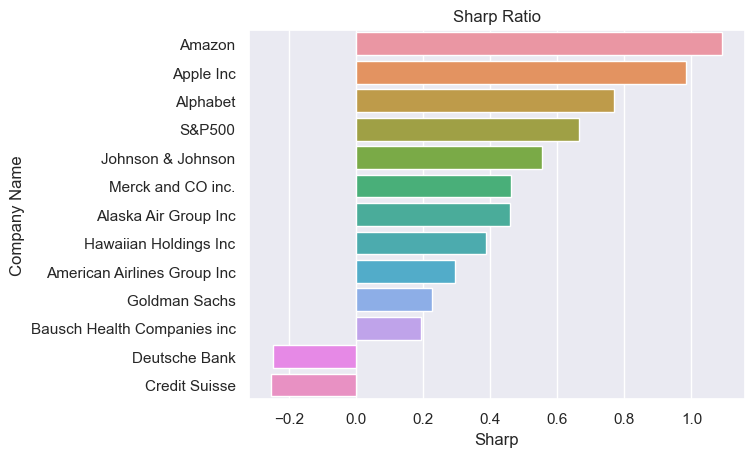

In [61]:
order = Returns.sort_values(by='Sharp',ascending=False)['Company Name']
sns.barplot(data=Returns,y='Company Name',x='Sharp',order=order)
plt.title('Sharp Ratio')
plt.show()

In [62]:
sns.barplot?

In [63]:
prices.head()

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2010-10-01                12.4475                        9.29   
2010-10-04                12.1425                        9.12   
2010-10-05                12.2150                        9.23   
2010-10-06                12.1875                        9.23   
2010-10-07                11.6250                        9.24   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2010-10-01                    5.96     42.226563     52.595421    147.699997   
2010-10-04                    5.75     41.914063     51.755726    146.570007   
2010-10-05                    5.85     43.154297     53.950382    149.570007   
2010-10-06                    5.97     43.437500     54.608780    150.839996   
2010-10-07                    6.15     43.671875     54.036259    151.110001   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2010-10-01                     25.750000         61.750000         36.599998   
2010-10-04                     25.870001         61.669998         36.520000   
2010-10-05                     26.299999         62.799999         37.020000   
2010-10-06                     26.690001         63.209999         37.009998   
2010-10-07                     26.600000         63.220001         36.709999   

Industry            Index  Technology                         
Company Name       S&P500    Alphabet      Amazon  Apple Inc  
Date                                                          
2010-10-01    1146.239990  261.828613  153.710007  10.090000  
2010-10-04    1137.030029  260.199707  155.389999   9.951428  
2010-10-05    1160.750000  268.110046  160.869995  10.319285  
2010-10-06    1159.969971  266.177307  155.399994  10.328215  
2010-10-07    1158.060059  264.015411  156.270004  10.329286

In [64]:
Beta=[]
for i in range(0,13):
    np_array = price_change.values
    m = np_array[:,9] # market returns are column zero from numpy array
    s = np_array[:,i] # stock returns are column one from numpy array
    covariance = np.cov(s,m) # Calculate covariance between stock and market
    beta = covariance[0,1]/covariance[1,1]
    Beta.append(round(beta,2))
Beta

[1.23, 1.35, 1.23, 1.37, 1.54, 1.3, 1.32, 0.66, 0.73, 1.0, 1.01, 1.0, 1.06]

In [65]:
Company=[]
for i,j in price_change.columns:
    Company.append(j)
Beta_df=pd.DataFrame({'Company Name':Company,'Beta':Beta})
Beta_df

Company Name  Beta
0          Alaska Air Group Inc  1.23
1   American Airlines Group Inc  1.35
2         Hawaiian Holdings Inc  1.23
3                 Credit Suisse  1.37
4                 Deutsche Bank  1.54
5                 Goldman Sachs  1.30
6   Bausch Health Companies inc  1.32
7             Johnson & Johnson  0.66
8             Merck and CO inc.  0.73
9                        S&P500  1.00
10                     Alphabet  1.01
11                       Amazon  1.00
12                    Apple Inc  1.06

In [66]:
Returns=pd.merge(Returns,Beta_df,on='Company Name')

In [67]:
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  Annual_Risk     Sharp  Beta  
0             0.352201             1     0.315735  1.091742  1.00  
1             0.284164             2     0.281273  0.983613  1.06  
2             0.206023             3     0.258561  0.767801  1.01  
3             0.192824             4     0.478573  0.387244  1.23  
4             0.178792             5     0.374043  0.457947  1.23  
5             0.160489             6     0.519504  0.294490  1.35  
6             0.122966             7     0.173574  0.665225  1.00  
7             0.116973             8     0.566714  0.193172  1.32  
8             0.103385             9     0.207142  0.462895  0.73  
9             0.103009            10     0.172187  0.554679  0.66  
10            0.073212            11     0.290996  0.225819  1.30  
11           -0.081888            12     0.352509 -0.253578  1.37  
12           -0.096102            13     0.418676 -0.247453  1.54

In [68]:
Returns['Expected_Returns']=0.0075+Returns['Beta']*(Returns.loc[Returns['Company Name']=='S&P500','Avg_Annual_Returns'].values[0]-0.0075)

In [69]:
Returns.loc[Returns['Company Name']=='S&P500','Avg_Annual_Returns'].values[0]

0.12296594451619881

In [70]:
Returns

Industry                 Company Name  Avg_Daily_Returns  \
0   Technology                       Amazon           0.001398   
1   Technology                    Apple Inc           0.001128   
2   Technology                     Alphabet           0.000818   
3     Aviation        Hawaiian Holdings Inc           0.000765   
4     Aviation         Alaska Air Group Inc           0.000709   
5     Aviation  American Airlines Group Inc           0.000637   
6        Index                       S&P500           0.000488   
7   Healthcare  Bausch Health Companies inc           0.000464   
8   Healthcare            Merck and CO inc.           0.000410   
9   Healthcare            Johnson & Johnson           0.000409   
10     Finance                Goldman Sachs           0.000291   
11     Finance                Credit Suisse          -0.000325   
12     Finance                Deutsche Bank          -0.000381   

    Avg_Annual_Returns  Returns_Rank  Annual_Risk     Sharp  Beta  \
0             0.352201             1     0.315735  1.091742  1.00   
1             0.284164             2     0.281273  0.983613  1.06   
2             0.206023             3     0.258561  0.767801  1.01   
3             0.192824             4     0.478573  0.387244  1.23   
4             0.178792             5     0.374043  0.457947  1.23   
5             0.160489             6     0.519504  0.294490  1.35   
6             0.122966             7     0.173574  0.665225  1.00   
7             0.116973             8     0.566714  0.193172  1.32   
8             0.103385             9     0.207142  0.462895  0.73   
9             0.103009            10     0.172187  0.554679  0.66   
10            0.073212            11     0.290996  0.225819  1.30   
11           -0.081888            12     0.352509 -0.253578  1.37   
12           -0.096102            13     0.418676 -0.247453  1.54   

    Expected_Returns  
0           0.122966  
1           0.129894  
2           0.124121  
3           0.149523  
4           0.149523  
5           0.163379  
6           0.122966  
7           0.159915  
8           0.091790  
9           0.083708  
10          0.157606  
11          0.165688  
12          0.185318

In [71]:
Capm_df=Returns.drop(['Avg_Daily_Returns','Returns_Rank'],axis=1)

In [72]:
Capm_df

Industry                 Company Name  Avg_Annual_Returns  Annual_Risk  \
0   Technology                       Amazon            0.352201     0.315735   
1   Technology                    Apple Inc            0.284164     0.281273   
2   Technology                     Alphabet            0.206023     0.258561   
3     Aviation        Hawaiian Holdings Inc            0.192824     0.478573   
4     Aviation         Alaska Air Group Inc            0.178792     0.374043   
5     Aviation  American Airlines Group Inc            0.160489     0.519504   
6        Index                       S&P500            0.122966     0.173574   
7   Healthcare  Bausch Health Companies inc            0.116973     0.566714   
8   Healthcare            Merck and CO inc.            0.103385     0.207142   
9   Healthcare            Johnson & Johnson            0.103009     0.172187   
10     Finance                Goldman Sachs            0.073212     0.290996   
11     Finance                Credit Suisse           -0.081888     0.352509   
12     Finance                Deutsche Bank           -0.096102     0.418676   

       Sharp  Beta  Expected_Returns  
0   1.091742  1.00          0.122966  
1   0.983613  1.06          0.129894  
2   0.767801  1.01          0.124121  
3   0.387244  1.23          0.149523  
4   0.457947  1.23          0.149523  
5   0.294490  1.35          0.163379  
6   0.665225  1.00          0.122966  
7   0.193172  1.32          0.159915  
8   0.462895  0.73          0.091790  
9   0.554679  0.66          0.083708  
10  0.225819  1.30          0.157606  
11 -0.253578  1.37          0.165688  
12 -0.247453  1.54          0.185318

In [73]:
Capm_df[Capm_df.describe().columns]=round(Capm_df[Capm_df.describe().columns],2)

In [74]:
cum_return=(price_change+1).cumprod()
cum_return.tail()

Industry                 Aviation                              \
Company Name Alaska Air Group Inc American Airlines Group Inc   
Date                                                            
2020-09-24               2.868046                    1.266954   
2020-09-25               2.948383                    1.322928   
2020-09-28               3.015867                    1.373520   
2020-09-29               2.945973                    1.318622   
2020-09-30               2.942760                    1.322928   

Industry                                 Finance                              \
Company Name Hawaiian Holdings Inc Credit Suisse Deutsche Bank Goldman Sachs   
Date                                                                           
2020-09-24                2.080537      0.227819      0.154196      1.320989   
2020-09-25                2.147651      0.224503      0.152104      1.319905   
2020-09-28                2.244966      0.234450      0.160280      1.347800   
2020-09-29                2.157718      0.232792      0.157238      1.332363   
2020-09-30                2.162752      0.236107      0.159710      1.360664   

Industry                      Healthcare                                      \
Company Name Bausch Health Companies inc Johnson & Johnson Merck and CO inc.   
Date                                                                           
2020-09-24                      0.591068          2.342834          2.271858   
2020-09-25                      0.594175          2.358866          2.265847   
2020-09-28                      0.593010          2.382348          2.261202   
2020-09-29                      0.577864          2.381538          2.237705   
2020-09-30                      0.603495          2.411012          2.266393   

Industry         Index Technology                        
Company Name    S&P500   Alphabet     Amazon  Apple Inc  
Date                                                     
2020-09-24    2.832382   5.455057  19.646021  10.725471  
2020-09-25    2.877635   5.518724  20.136164  11.127849  
2020-09-28    2.923995   5.593430  20.649599  11.393459  
2020-09-29    2.909923   5.611801  20.459825  11.307234  
2020-09-30    2.933941   5.612832  20.484873  11.477700

In [75]:
# Cumulative Returns for the 10 year period for each stock
cumulative=[]
company=[]
for i,j in prices.columns:
    x=(prices[i,j][-1]-prices[i,j][0])/prices[i,j][0]
    x=round(x,2)
    cumulative.append(x)
    company.append(j)
cumu_return=pd.DataFrame({'Company Name':company,'Cumulative_return':cumulative})

In [76]:
Capm_df=pd.merge(Capm_df,cumu_return,on='Company Name')

In [77]:
Capm_df.columns

Index(['Industry', 'Company Name', 'Avg_Annual_Returns', 'Annual_Risk',
       'Sharp', 'Beta', 'Expected_Returns', 'Cumulative_return'],
      dtype='object')

In [78]:
Capm_df=Capm_df[['Industry', 'Company Name',  'Annual_Risk','Avg_Annual_Returns','Cumulative_return', 
       'Sharp', 'Beta', 'Expected_Returns']]

In [79]:
Capm_df.sort_values(by='Sharp',ascending=False)

Industry                 Company Name  Annual_Risk  Avg_Annual_Returns  \
0   Technology                       Amazon         0.32                0.35   
1   Technology                    Apple Inc         0.28                0.28   
2   Technology                     Alphabet         0.26                0.21   
6        Index                       S&P500         0.17                0.12   
9   Healthcare            Johnson & Johnson         0.17                0.10   
4     Aviation         Alaska Air Group Inc         0.37                0.18   
8   Healthcare            Merck and CO inc.         0.21                0.10   
3     Aviation        Hawaiian Holdings Inc         0.48                0.19   
5     Aviation  American Airlines Group Inc         0.52                0.16   
10     Finance                Goldman Sachs         0.29                0.07   
7   Healthcare  Bausch Health Companies inc         0.57                0.12   
11     Finance                Credit Suisse         0.35               -0.08   
12     Finance                Deutsche Bank         0.42               -0.10   

    Cumulative_return  Sharp  Beta  Expected_Returns  
0               19.48   1.09  1.00              0.12  
1               10.48   0.98  1.06              0.13  
2                4.61   0.77  1.01              0.12  
6                1.93   0.67  1.00              0.12  
9                1.41   0.55  0.66              0.08  
4                1.94   0.46  1.23              0.15  
8                1.27   0.46  0.73              0.09  
3                1.16   0.39  1.23              0.15  
5                0.32   0.29  1.35              0.16  
10               0.36   0.23  1.30              0.16  
7               -0.40   0.19  1.32              0.16  
11              -0.76  -0.25  1.37              0.17  
12              -0.84  -0.25  1.54              0.19

In [80]:
Capm_df

Industry                 Company Name  Annual_Risk  Avg_Annual_Returns  \
0   Technology                       Amazon         0.32                0.35   
1   Technology                    Apple Inc         0.28                0.28   
2   Technology                     Alphabet         0.26                0.21   
3     Aviation        Hawaiian Holdings Inc         0.48                0.19   
4     Aviation         Alaska Air Group Inc         0.37                0.18   
5     Aviation  American Airlines Group Inc         0.52                0.16   
6        Index                       S&P500         0.17                0.12   
7   Healthcare  Bausch Health Companies inc         0.57                0.12   
8   Healthcare            Merck and CO inc.         0.21                0.10   
9   Healthcare            Johnson & Johnson         0.17                0.10   
10     Finance                Goldman Sachs         0.29                0.07   
11     Finance                Credit Suisse         0.35               -0.08   
12     Finance                Deutsche Bank         0.42               -0.10   

    Cumulative_return  Sharp  Beta  Expected_Returns  
0               19.48   1.09  1.00              0.12  
1               10.48   0.98  1.06              0.13  
2                4.61   0.77  1.01              0.12  
3                1.16   0.39  1.23              0.15  
4                1.94   0.46  1.23              0.15  
5                0.32   0.29  1.35              0.16  
6                1.93   0.67  1.00              0.12  
7               -0.40   0.19  1.32              0.16  
8                1.27   0.46  0.73              0.09  
9                1.41   0.55  0.66              0.08  
10               0.36   0.23  1.30              0.16  
11              -0.76  -0.25  1.37              0.17  
12              -0.84  -0.25  1.54              0.19

In [81]:
# Lets short list stocks which has Beta close to 1 or less than 1
Capm_df[Capm_df.Beta<1.1]

Industry       Company Name  Annual_Risk  Avg_Annual_Returns  \
0  Technology             Amazon         0.32                0.35   
1  Technology          Apple Inc         0.28                0.28   
2  Technology           Alphabet         0.26                0.21   
6       Index             S&P500         0.17                0.12   
8  Healthcare  Merck and CO inc.         0.21                0.10   
9  Healthcare  Johnson & Johnson         0.17                0.10   

   Cumulative_return  Sharp  Beta  Expected_Returns  
0              19.48   1.09  1.00              0.12  
1              10.48   0.98  1.06              0.13  
2               4.61   0.77  1.01              0.12  
6               1.93   0.67  1.00              0.12  
8               1.27   0.46  0.73              0.09  
9               1.41   0.55  0.66              0.08

Assuming we take all three tech stocks ans J&J which has least risk and has decent returns

In [ ]:
'Johnson & Johnson','Merck and CO inc.',

In [233]:
portfolio=pd.DataFrame()
for i,j in prices.columns:
        if j in ['Johnson & Johnson','Merck and CO inc.','Amazon','Apple Inc','Alphabet']:
            portfolio[j]=prices[i,j]
portfolio.head()

Johnson & Johnson  Merck and CO inc.    Alphabet      Amazon  \
Date                                                                       
2010-10-01          61.750000          36.599998  261.828613  153.710007   
2010-10-04          61.669998          36.520000  260.199707  155.389999   
2010-10-05          62.799999          37.020000  268.110046  160.869995   
2010-10-06          63.209999          37.009998  266.177307  155.399994   
2010-10-07          63.220001          36.709999  264.015411  156.270004   

            Apple Inc  
Date                   
2010-10-01  10.090000  
2010-10-04   9.951428  
2010-10-05  10.319285  
2010-10-06  10.328215  
2010-10-07  10.329286

Assuming equal weights for each stock since we dont know the total investment amount

In [234]:
port_columns=portfolio.columns

In [235]:
port_columns

Index(['Johnson & Johnson', 'Merck and CO inc.', 'Alphabet', 'Amazon',
       'Apple Inc'],
      dtype='object')

In [236]:
weightage=1/len(port_columns)

In [237]:
initial_weight = []
i=0
while i<len(port_columns):
    initial_weight.append(weightage)
    i=i+1

initial_weight=np.array(initial_weight)


In [238]:
portfolio['portfolio']=0
for i in port_columns:
    portfolio['portfolio']=portfolio['portfolio']+portfolio[i]*weightage
portfolio.head()
    

Johnson & Johnson  Merck and CO inc.    Alphabet      Amazon  \
Date                                                                       
2010-10-01          61.750000          36.599998  261.828613  153.710007   
2010-10-04          61.669998          36.520000  260.199707  155.389999   
2010-10-05          62.799999          37.020000  268.110046  160.869995   
2010-10-06          63.209999          37.009998  266.177307  155.399994   
2010-10-07          63.220001          36.709999  264.015411  156.270004   

            Apple Inc   portfolio  
Date                               
2010-10-01  10.090000  104.795724  
2010-10-04   9.951428  104.746226  
2010-10-05  10.319285  107.823865  
2010-10-06  10.328215  106.425103  
2010-10-07  10.329286  106.108940

In [239]:
portfolio.tail()

Johnson & Johnson  Merck and CO inc.     Alphabet       Amazon  \
Date                                                                         
2020-09-24         144.669998          83.150002  1428.290039  3019.790039   
2020-09-25         145.660004          82.930000  1444.959961  3095.129883   
2020-09-28         147.110001          82.760002  1464.520020  3174.050049   
2020-09-29         147.059998          81.900002  1469.329956  3144.879883   
2020-09-30         148.880005          82.949997  1469.599976  3148.729980   

             Apple Inc   portfolio  
Date                                
2020-09-24  108.220001  956.824016  
2020-09-25  112.279999  976.191969  
2020-09-28  114.959999  996.680014  
2020-09-29  114.089996  991.451967  
2020-09-30  115.809998  993.193991

<Axes: xlabel='Date'>

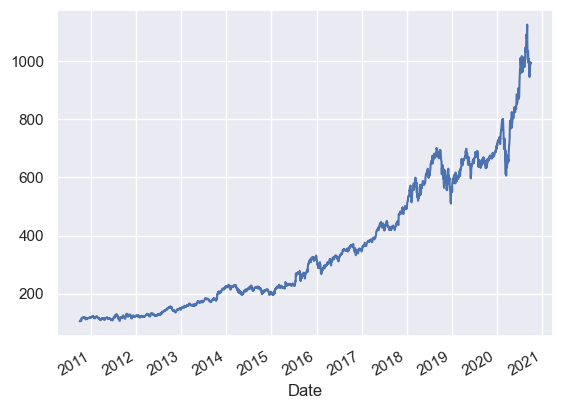

In [240]:
portfolio.portfolio.plot()

In [241]:
portfolio_returns=portfolio.pct_change()

In [242]:
portfolio_returns.portfolio.mean()

0.0009994427182509972

In [243]:
portfolio_returns.portfolio.mean()*252

0.2518595649992513

In [244]:
Annual_returns=portfolio_returns.portfolio.mean()*252

In [245]:
portfolio_returns.portfolio.std()

0.01452291791040767

In [246]:
portfolio_returns.portfolio.std()*252**0.5

0.2305441746116671

In [247]:
covariance_portfolio = portfolio_returns.iloc[:,:-1]
covariance_portfolio = (covariance_portfolio.cov())*252

covariance_portfolio

Johnson & Johnson  Merck and CO inc.  Alphabet    Amazon  \
Johnson & Johnson           0.029648           0.020663  0.018386  0.017524   
Merck and CO inc.           0.020663           0.042908  0.019540  0.017795   
Alphabet                    0.018386           0.019540  0.066854  0.046959   
Amazon                      0.017524           0.017795  0.046959  0.099689   
Apple Inc                   0.018014           0.019160  0.038189  0.038568   

                   Apple Inc  
Johnson & Johnson   0.018014  
Merck and CO inc.   0.019160  
Alphabet            0.038189  
Amazon              0.038568  
Apple Inc           0.079115

In [248]:
portfolio_variance = np.dot(initial_weight.T,np.dot(covariance_portfolio, initial_weight))

In [249]:
portfolio_variance

0.033112243471141965

In [250]:
portfolio_risk = np.sqrt(portfolio_variance)
portfolio_risk

0.1819676989774338

In [251]:
Sharp_ratio=(Annual_returns-0.0075)/portfolio_risk
Sharp_ratio

1.3428733031874784

In [252]:
portfolio_returns.dropna(inplace=True)

In [261]:
portfolio_returns=pd.merge(portfolio_returns,price_change['Index'],on=portfolio_returns.index)

TypeError: merge() got an unexpected keyword argument 'index'

In [254]:
portfolio_returns.head()

key_0  Johnson & Johnson  Merck and CO inc.  Alphabet    Amazon  \
0 2010-10-04          -0.001296          -0.002186 -0.006221  0.010930   
1 2010-10-05           0.018323           0.013691  0.030401  0.035266   
2 2010-10-06           0.006529          -0.000270 -0.007209 -0.034003   
3 2010-10-07           0.000158          -0.008106 -0.008122  0.005599   
4 2010-10-08           0.000158           0.005448  0.011962 -0.004607   

   Apple Inc  portfolio    S&P500  
0  -0.013734  -0.000472 -0.008035  
1   0.036965   0.029382  0.020861  
2   0.000865  -0.012973 -0.000672  
3   0.000104  -0.002971 -0.001647  
4   0.016769   0.005318  0.006122

In [255]:
np_array = portfolio_returns[['portfolio','S&P500']].values
m = np_array[:,1] 
s = np_array[:,0] 
covariance = np.cov(s, m)
beta = covariance[0,1]/covariance[1,1]
beta

0.9604911522165915

In [256]:
#expected return
round(0.0075+beta*(252*portfolio_returns['S&P500'].mean()-0.0075),2)

0.12

In [259]:
portfolio_returns.set_index('key_0')

Johnson & Johnson  Merck and CO inc.  Alphabet    Amazon  \
key_0                                                                  
2010-10-04          -0.001296          -0.002186 -0.006221  0.010930   
2010-10-05           0.018323           0.013691  0.030401  0.035266   
2010-10-06           0.006529          -0.000270 -0.007209 -0.034003   
2010-10-07           0.000158          -0.008106 -0.008122  0.005599   
2010-10-08           0.000158           0.005448  0.011962 -0.004607   
...                       ...                ...       ...       ...   
2020-09-24           0.001592           0.006293  0.009242  0.006644   
2020-09-25           0.006843          -0.002646  0.011671  0.024949   
2020-09-28           0.009955          -0.002050  0.013537  0.025498   
2020-09-29          -0.000340          -0.010391  0.003284 -0.009190   
2020-09-30           0.012376           0.012820  0.000184  0.001224   

            Apple Inc  portfolio    S&P500  
key_0                                       
2010-10-04  -0.013734  -0.000472 -0.008035  
2010-10-05   0.036965   0.029382  0.020861  
2010-10-06   0.000865  -0.012973 -0.000672  
2010-10-07   0.000104  -0.002971 -0.001647  
2010-10-08   0.016769   0.005318  0.006122  
...               ...        ...       ...  
2020-09-24   0.010269   0.007340  0.002987  
2020-09-25   0.037516   0.020242  0.015977  
2020-09-28   0.023869   0.020988  0.016111  
2020-09-29  -0.007568  -0.005245 -0.004813  
2020-09-30   0.015076   0.001757  0.008254  

[2516 rows x 7 columns]

In [ ]:
for i in price_vol.loc[:,'Close'].columns:
    for j in dict(price_vol.columns).keys():
        if j=='Close':
            (price_vol[j,i]/price_vol[j,i][0]).plot(label=j,figsize=[12,8])
        else:
            x=price_vol[j,i]-price_vol[j,i].mean()
            (x/price_vol[j,i].mean()).plot(label=j,figsize=[12,8])
    plt.legend()
    plt.title(i)
    plt.show()

In [293]:
from statsmodels.tsa.stattools import kpss

for i,j in price_vol.columns:
    if j in ['Johnson & Johnson','Merck and CO inc.','Amazon','Apple Inc','Alphabet']:
        kpss_test = kpss(price_vol[i,j])

        print(i+'-'+j)
        print('KPSS Statistic: %f' % kpss_test[0])
        print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
        print('p-value: %f' % kpss_test[1])

        if kpss_test[1] <= 0.05:
            print("\nSeries is Stationary")
        else:
            print("\nSeries is Non-Stationary")

        print('\n--------------------------------------\n')

Close-Alphabet
KPSS Statistic: 7.892446
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close-Amazon
KPSS Statistic: 6.956628
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close-Apple Inc
KPSS Statistic: 6.131432
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close-Johnson & Johnson
KPSS Statistic: 7.880246
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Close-Merck and CO inc.
KPSS Statistic: 7.087248
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Volume-Alphabet
KPSS Statistic: 6.352296
Critical Values @ 0.05: 0.46
p-value: 0.010000

Series is Stationary

--------------------------------------

Volume-Amazon
KPSS Statistic: 0.505779
Critical Values @ 0.05: 0.46
p-value: 0.040

C:\Users\HP\AppData\Local\Temp\ipykernel_15944\2342567272.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(price_vol[i,j])
C:\Users\HP\AppData\Local\Temp\ipykernel_15944\2342567272.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(price_vol[i,j])
C:\Users\HP\AppData\Local\Temp\ipykernel_15944\2342567272.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(price_vol[i,j])
C:\Users\HP\AppData\Local\Temp\ipykernel_15944\2342567272.py:5: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller

All the series are stationary. Hence, differencing is required not for any columns.

price volume Dataframe of Stocks in Portfolio 

In [297]:
Portfolio_price_vol=price_vol.copy()
for i,j in price_vol.columns:
    if j in ['Johnson & Johnson','Merck and CO inc.','Amazon','Apple Inc','Alphabet']:
        continue
    else:
        Portfolio_price_vol.drop((i,j),axis=1,inplace=True)
Portfolio_price_vol.head()

Close                                           \
Company Name    Alphabet      Amazon  Apple Inc Johnson & Johnson   
Date                                                                
2010-10-01    261.828613  153.710007  10.090000         61.750000   
2010-10-04    260.199707  155.389999   9.951428         61.669998   
2010-10-05    268.110046  160.869995  10.319285         62.799999   
2010-10-06    266.177307  155.399994  10.328215         63.209999   
2010-10-07    264.015411  156.270004  10.329286         63.220001   

                                   Volume                          \
Company Name Merck and CO inc.   Alphabet     Amazon    Apple Inc   
Date                                                                
2010-10-01           36.599998  4466600.0  8683400.0  448142800.0   
2010-10-04           36.520000  3895400.0  5346500.0  435302000.0   
2010-10-05           37.020000  7040400.0  5620000.0  501967200.0   
2010-10-06           37.009998  5545200.0  6060800.0  670868800.0   
2010-10-07           36.709999  4809400.0  4622000.0  408399600.0   

                                                  
Company Name Johnson & Johnson Merck and CO inc.  
Date                                              
2010-10-01           9773200.0        11741900.0  
2010-10-04           8703600.0         9234900.0  
2010-10-05          12439400.0        10669200.0  
2010-10-06          11339800.0         7541300.0  
2010-10-07           9826600.0        13897800.0

In [299]:
# Keeping 70% values as train
train_len = int(Portfolio_price_vol.shape[0]*0.7)
test_len = int(Portfolio_price_vol.shape[0]) - int(Portfolio_price_vol.shape[0]*0.7)

# Train data
train_data = Portfolio_price_vol[:train_len] 

# Test data
test_data = Portfolio_price_vol[train_len:]

# Train data - differenced
#train_data_boxcox = data_boxcox[:train_len]
#train_data_boxcox_diff = data_boxcox_diff[:train_len-1]

# Test data - differenced
#test_data_boxcox = data_boxcox[train_len:]
#test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [303]:
# Fitting the VAR model to the data
from statsmodels.tsa.api import VAR

model = VAR(train_data[[('Close','Alphabet'),('Volume','Alphabet')]])

C:\Users\HP\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [304]:
# To select the lag order
x = model.select_order(maxlags=50)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [306]:
# Providing maxlags as 5 (minimum AIC vaue)
results = model.fit(maxlags = 5, ic = 'aic')

In [307]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 04, Feb, 2024
Time:                     17:19:16
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    32.9482
Nobs:                     1756.00    HQIC:                   32.9050
Log likelihood:          -33829.7    FPE:                1.90311e+14
AIC:                      32.8797    Det(Omega_mle):     1.87949e+14
--------------------------------------------------------------------
Results for equation Close_Alphabet
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                      1.173460         1.025715            1.144           0.253
L1.Close_Alphabet          1.029069         0.023938           42.990           0.000
L1.Volume_Alphabet         0.00

In [308]:
# Forecasting using the VAR model
# Selecting the lag value from the above results
lag_order = 5

In [310]:
# Obtaining the forecast values
predicted = results.forecast(train_data[[('Close','Alphabet'),('Volume','Alphabet')]].values[-lag_order:], test_len)
forecast = pd.DataFrame(predicted, index = Portfolio_price_vol[[('Close','Alphabet'),('Volume','Alphabet')]].index[train_len:], columns = Portfolio_price_vol[[('Close','Alphabet'),('Volume','Alphabet')]].columns)

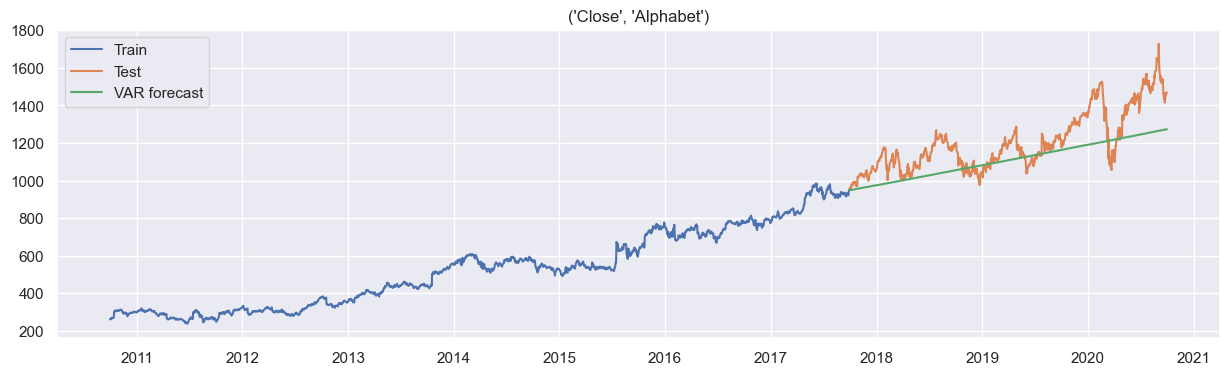

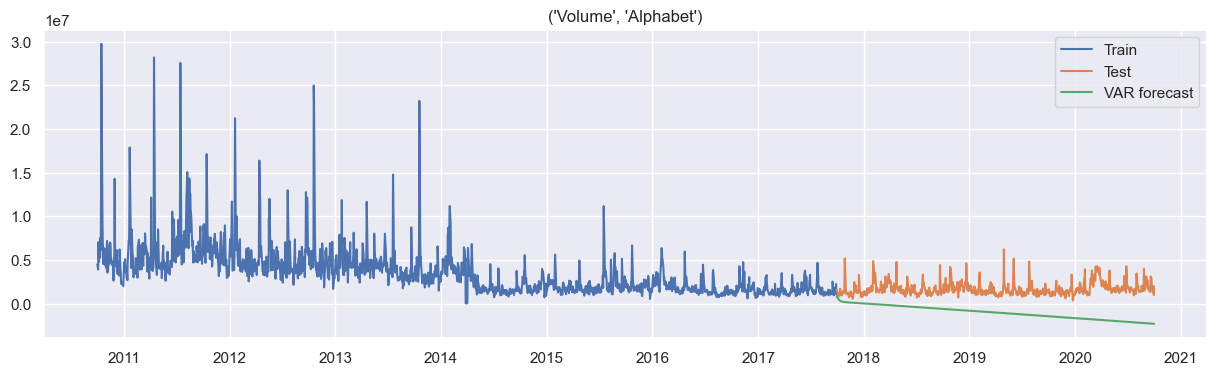

In [311]:
# Printing the train, test and forecasted values
for col in Portfolio_price_vol[[('Close','Alphabet'),('Volume','Alphabet')]]:
    plt.figure(figsize=(15,4))
    plt.plot(Portfolio_price_vol[col][:train_len], label='Train')
    plt.plot(Portfolio_price_vol[col][train_len:], label='Test')
    plt.plot(forecast[col][:], label='VAR forecast')
    plt.legend(loc='best')
    plt.title(col)
    plt.show()

In [313]:
# Model Evaluation
from sklearn.metrics import mean_squared_error

eval_results = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])
tempResults = pd.DataFrame(columns=['Column', 'RMSE', 'MAPE'])

for col in Portfolio_price_vol[[('Close','Alphabet'),('Volume','Alphabet')]].columns:
    rmse = np.sqrt(mean_squared_error(test_data[col], forecast[col][:])).round(2)
    mape = np.round(np.mean(np.abs(test_data[col]-forecast[col][:])/test_data[col])*100,2)

    tempResults = pd.DataFrame({'Column':[col], 'RMSE': [rmse],'MAPE': [mape] })
    eval_results = pd.concat([eval_results, tempResults])
    
eval_results

Column        RMSE    MAPE
0   (Close, Alphabet)      136.63    8.37
0  (Volume, Alphabet)  2911709.50  169.81

In [ ]:
beta

In [ ]:
pd.pivot_table?

In [ ]:
prices=pd.DataFrame(SP500['Close'])
dataframes = {name: globals()[name] for name in industry['Ticker']}
for df_name, df in dataframes.items():
    print("{} has shape {}".format(df_name,df.shape))
    

In [ ]:
SP500.shape

In [ ]:
CS.head()

In [ ]:
for df_name, df in dataframes.items():
    print("{} has {} Null values".format(df_name,df.isnull().sum()))

In [ ]:
for df_name, df in dataframes.items():
    df.drop_duplicates(inplace=True)
    df.dropna(inplace=True)

In [ ]:
dataframes = {name: globals()[name] for name in industry['Ticker']}
for df_name, df in dataframes.items():
    print("{} has shape {}".format(df_name,df.shape))

In [ ]:
CS.head()

In [ ]:
CS.tail()

In [ ]:
CS.shape

In [ ]:
CS.head()

In [ ]:
SP500.head()

In [ ]:
SP500.tail()

In [ ]:
GOOG.tail()

In [ ]:
GOOG.drop_duplicates(inplace=True)
GOOG.shape

In [ ]:
prices.head()

In [ ]:
columns=['SP500']
for df_name, df in dataframes.items():
    prices=pd.merge(prices,df['Close'],how='outer',on='Date')
    columns.append(df_name)
prices.columns=columns
  

In [ ]:
pd.merge?

In [ ]:
prices.head()

In [ ]:
prices.shape

In [ ]:
prices.isnull().sum()

In [ ]:
prices.dropna(axis=0,inplace=True)
prices.isnull().sum()

In [ ]:
prices.shape

In [ ]:
x=pd.read_csv('S&P500.csv',index_col='Date')
plt.figure(figsize=[15,10])
x.Close.plot()
plt.show()

In [ ]:
y=pd.read_csv('S&P500.csv',parse_dates=True, index_col='Date', infer_datetime_format=True)
plt.figure(figsize=[15,10])
y.Close.plot()
plt.show()

In [ ]:
y = pd.read_csv('S&P500.csv', parse_dates=True, index_col='Date')

# Resample the data to include missing dates (daily frequency) and forward-fill missing values
y_resampled = y.resample('D').ffill()

# Plot the original and forward-filled data
plt.figure(figsize=(10, 6))
y['Close'].plot(label='Original Data')
y_resampled['Close'].plot(label='Forward-filled Data')
plt.legend()
plt.show()

In [ ]:
for i in prices.columns:
    plt.figure(figsize=[10,6])
    prices[i].plot()
    plt.title(i)
    plt.show()

In [ ]:
returns=prices.pct_change()

In [ ]:
returns.head()

In [ ]:
returns.dropna(axis=0,inplace=True)

In [ ]:
returns.head()

In [ ]:
for i in returns.columns:
    if i!='SP500':
        returns[[i,'SP500']].plot()
        plt.title(i)
        plt.show()

In [ ]:
for i in returns.columns:
        sns.histplot(returns[i])
        plt.title(i)
        plt.show()

In [ ]:
for i in returns.columns:
        sns.boxplot(returns[i])
        plt.title(i)
        plt.show()

In [ ]:
returns.median()

In [ ]:
returns.mean()

# Outlier treatment

Lets replace outliers with median values

In [ ]:
# Replacing the outliers with the median value
for col in returns.columns:
    Q1 = returns[col].quantile(0.01)
    Q3 = returns[col].quantile(0.99)
    IQR = Q3 - Q1
    
    col_median = returns[col].median()
    
    # IQR
    returns[col] = np.where(returns[col] < Q1, col_median, returns[col])
    returns[col] = np.where(returns[col] > Q3, col_median, returns[col])

In [ ]:
for i in returns.columns:
        sns.boxplot(returns[i],orient='h')
        plt.title(i)
        plt.show()

In [ ]:
for i in returns.columns:
        sns.distplot(returns[i])
        plt.title(i)
        plt.show()

In [ ]:
returns.mean()

In [ ]:
Cumulative_returns_daily = (1+returns).cumprod()
Cumulative_returns_daily.tail(5)

In [ ]:
Cumulative_returns_daily.head(50)

In [ ]:
for i in Cumulative_returns_daily .columns:
        Cumulative_returns_daily[i].plot()
        plt.title(i)
        plt.show()